<h1>Istrazivacka analiza podataka</h1>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from kneed import KneeLocator

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("C:\\Users\\Nikola\\Python projects\\ML\\Project 2\\google_review_ratings.csv")
df.head()
df.columns = ['user', 
'churches',
'resorts',
'beaches',
'parks',
'theatres',
'museums',
'malls',
'zoo',
'restaurants',
'pubs/bars',
'local services',
'burger/pizza shops',
'hotels/other lodgings',
'juice bars',
'art galleries',
'dance clubs',
'swimming pools',
'gyms',
'bakeries',
'beauty & spas',
'cafes',
'view points',
'monuments',
'gardens',
'unnamed']
df = df.set_index('user')
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,unnamed
user,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
df.shape

(5456, 25)

In [4]:
df.columns

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs/bars', 'local services',
       'burger/pizza shops', 'hotels/other lodgings', 'juice bars',
       'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries',
       'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens',
       'unnamed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15 

In [6]:
df.drop(["unnamed"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5455 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15 

In [7]:
df['local services'].head()

user
User 1     1.7
User 2     1.7
User 3     1.7
User 4    1.73
User 5     1.7
Name: local services, dtype: object

In [8]:
df["local services"] = pd.to_numeric(df["local services"], errors= 'coerce')
df['local services']

user
User 1       1.70
User 2       1.70
User 3       1.70
User 4       1.73
User 5       1.70
             ... 
User 5452    1.02
User 5453    1.01
User 5454    0.99
User 5455    0.97
User 5456    0.95
Name: local services, Length: 5456, dtype: float64

<h4>Distribucija atributa</h4>

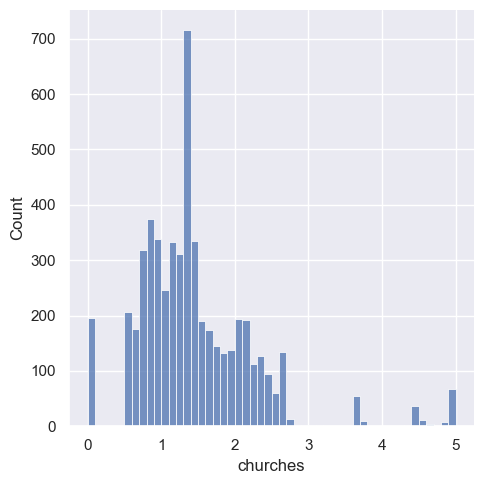

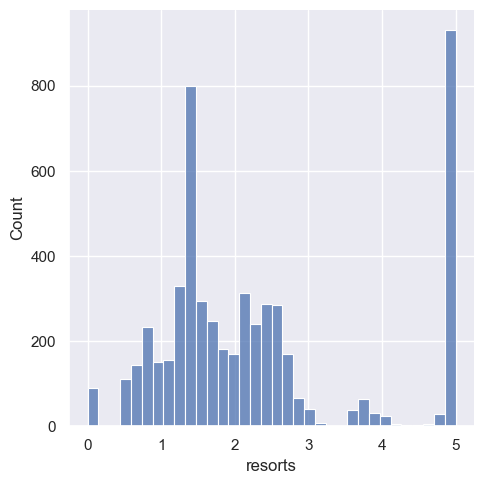

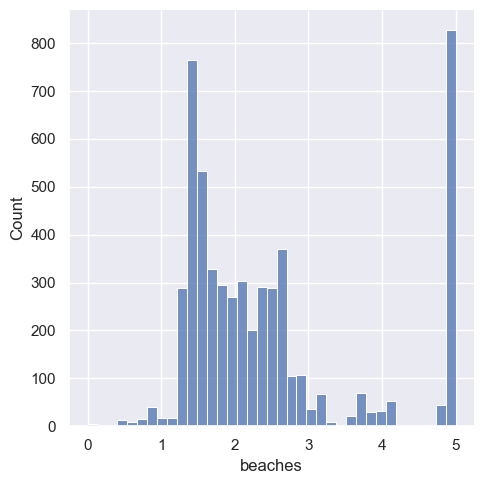

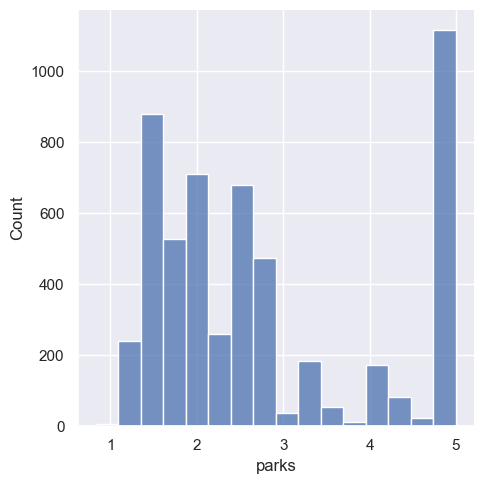

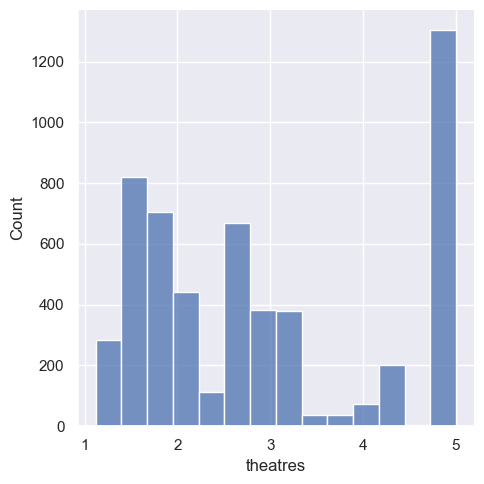

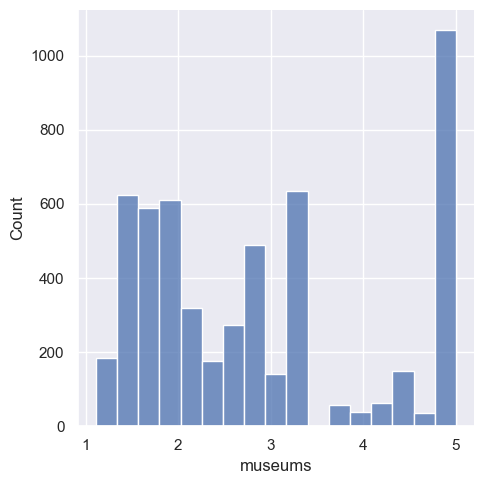

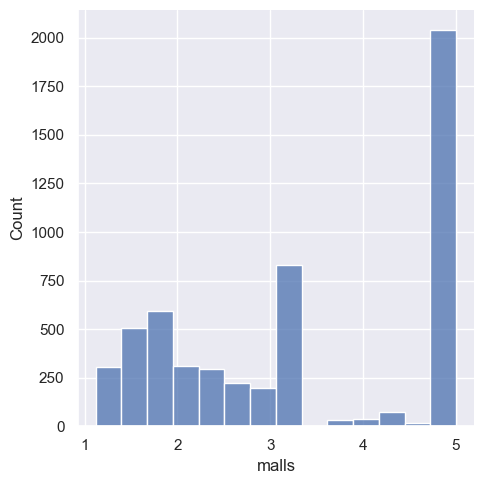

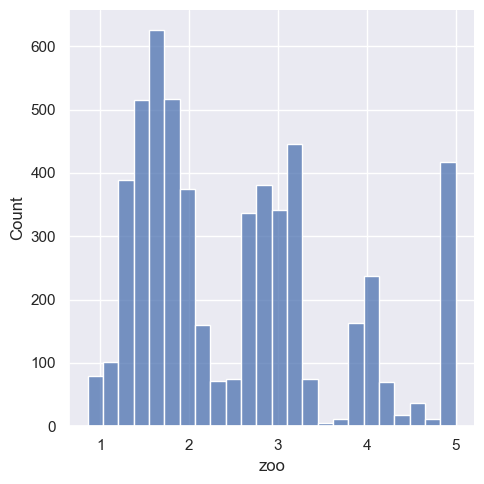

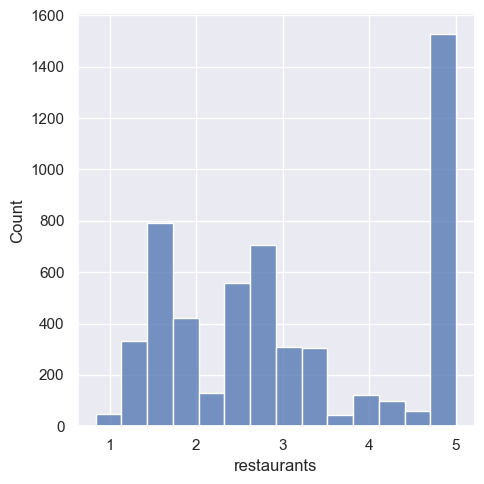

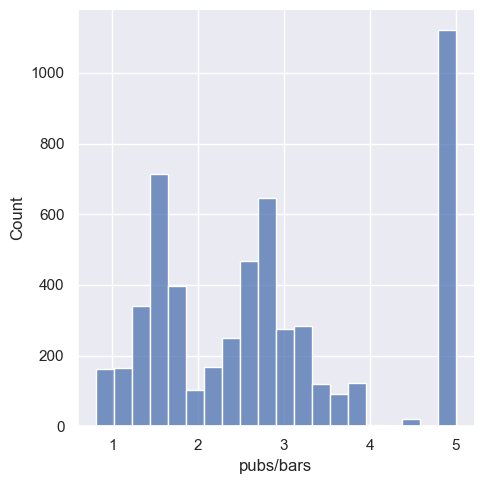

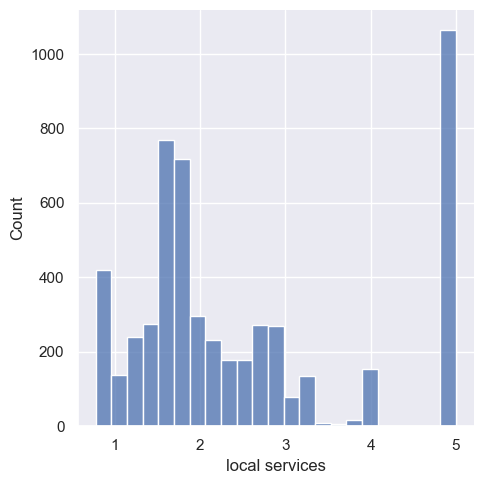

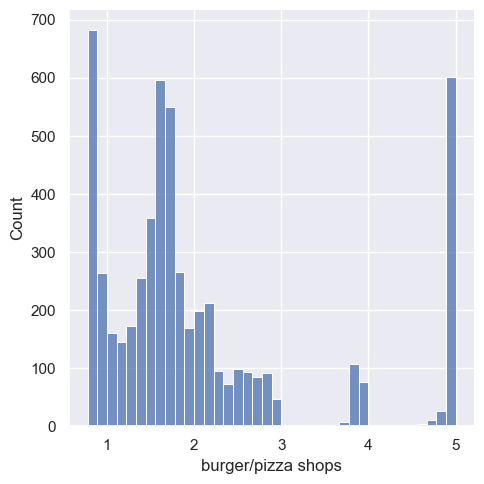

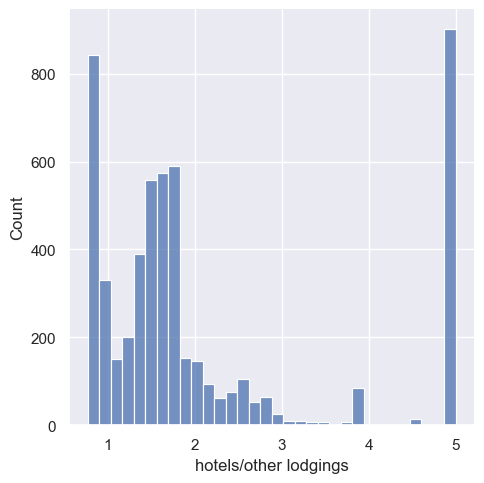

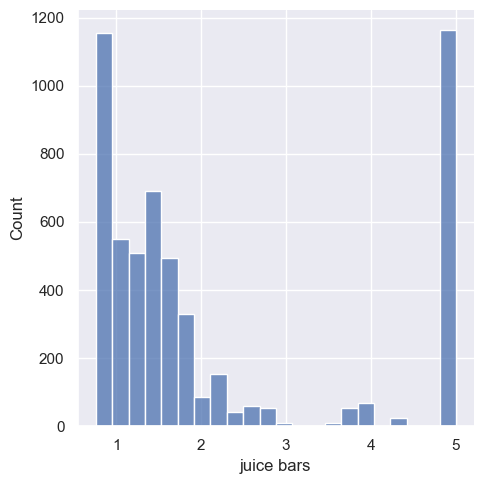

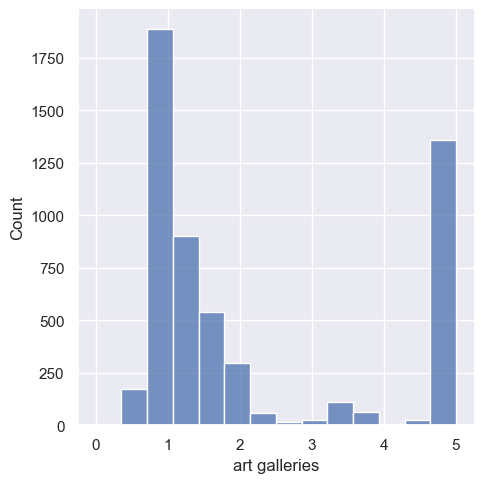

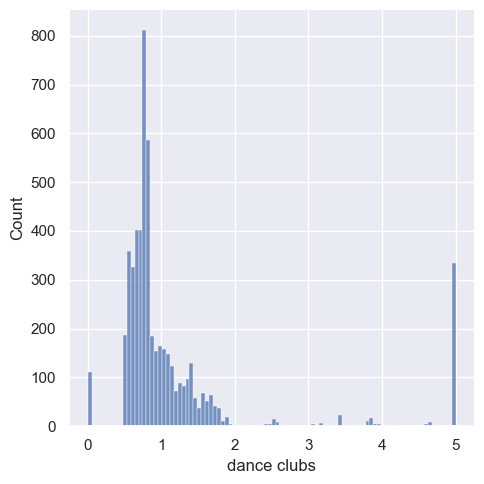

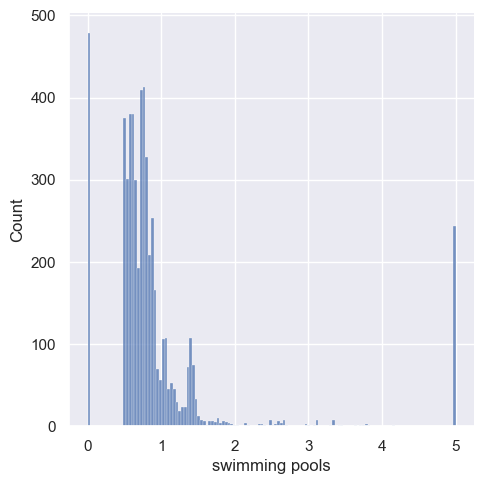

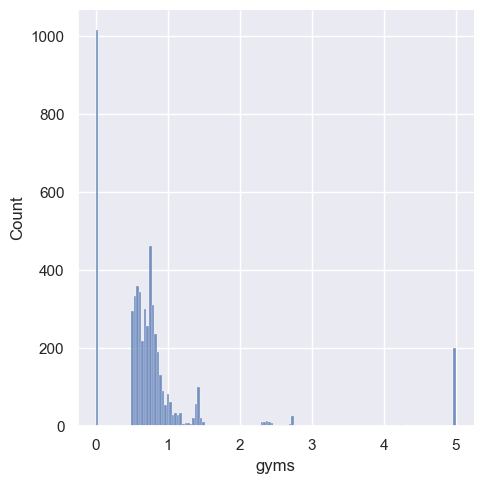

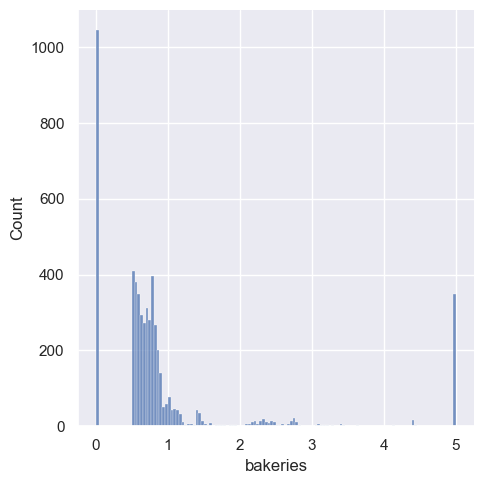

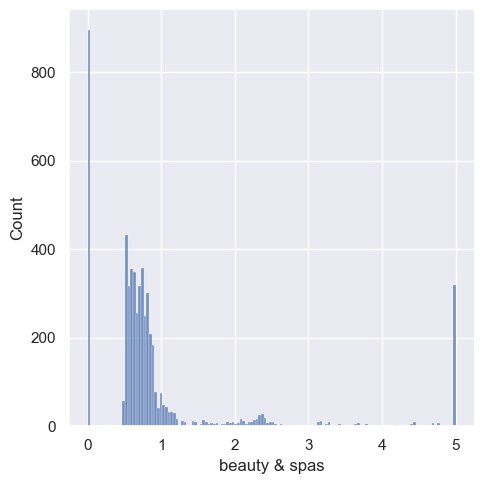

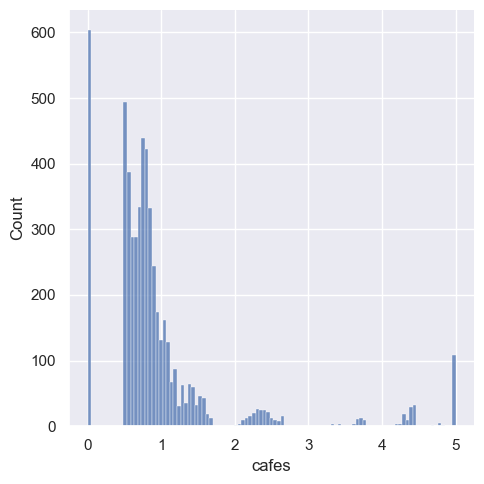

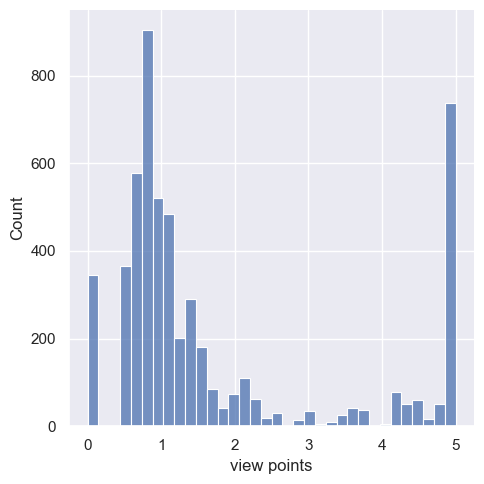

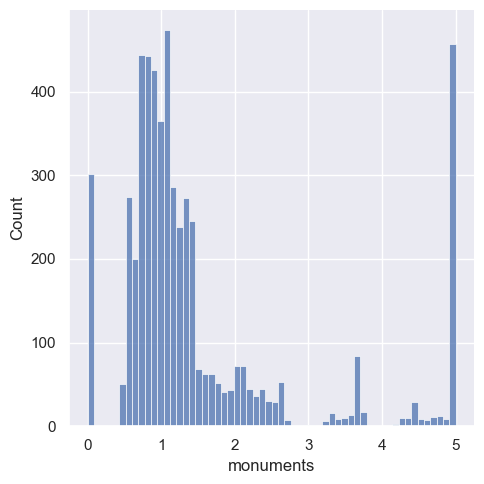

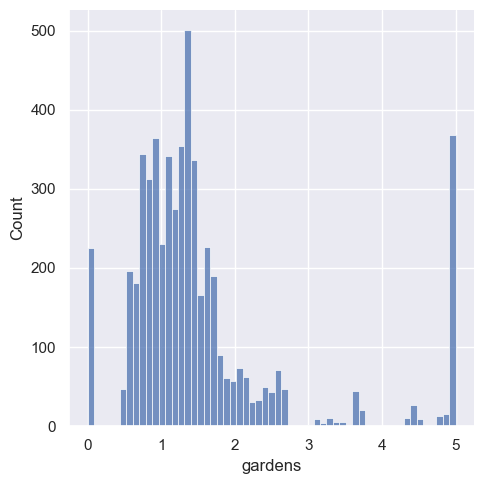

In [69]:
sns.set_theme()
for column in df.columns:
    sns.displot(df[column])
    plt.show()

<h1>Preprocesiranje podataka</h1>

In [9]:
df.isna().sum()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           1
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

In [10]:
df['local services'].fillna(df['local services'].mean(),inplace=True)
df['burger/pizza shops'].fillna(df['burger/pizza shops'].mean(),inplace=True)
df['gardens'].fillna(df['gardens'].mean(),inplace=True)

In [11]:
df.isna().sum().sum()

0

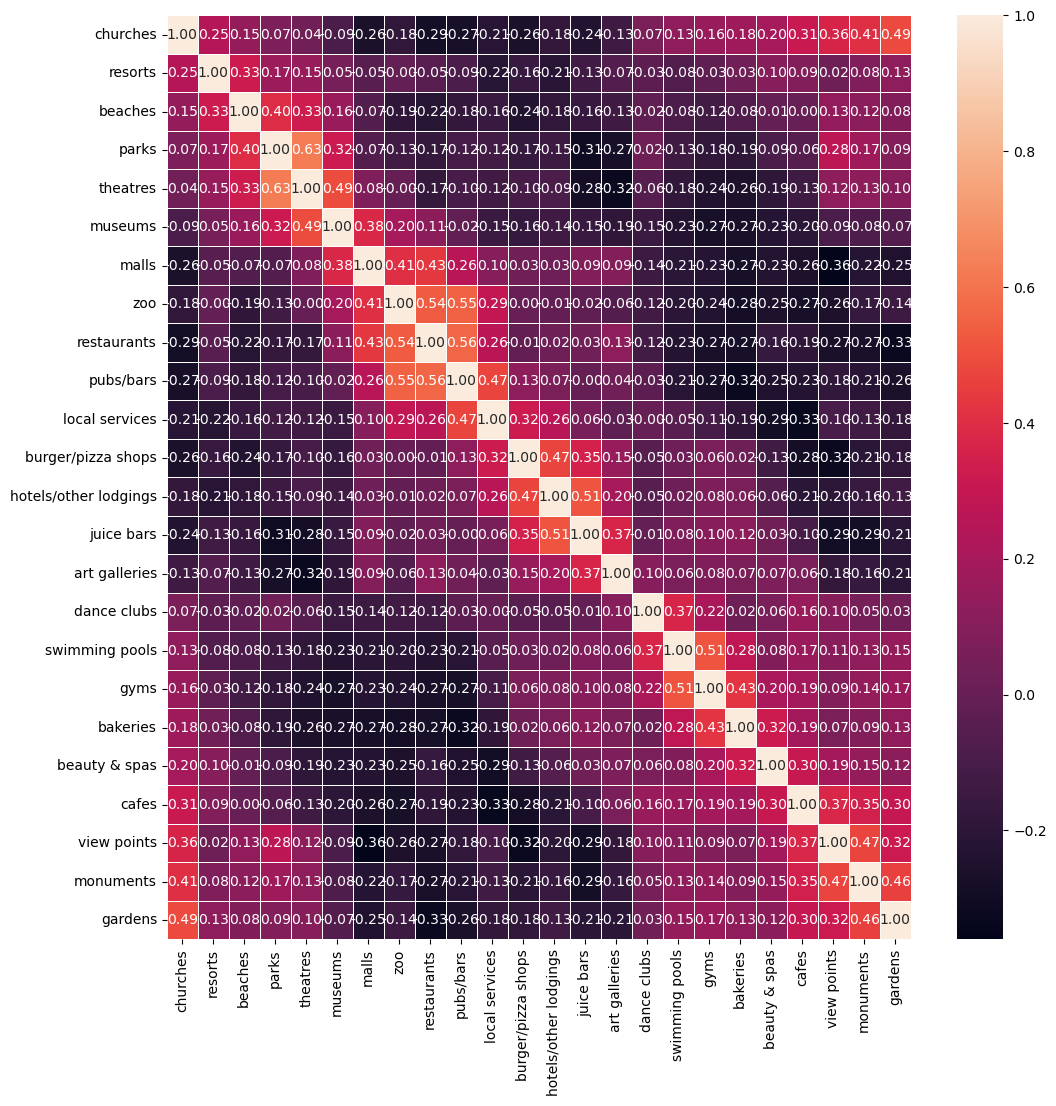

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f")
plt.show()


In [74]:
df[df.duplicated()]

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
user,,,,,,,,,,,,,,,,,,,,,
User 5,0.00,0.0,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.50,0.0,0.0,0.00,0.00,0.00
User 675,0.00,0.0,1.45,1.43,1.42,1.43,1.48,1.48,2.72,2.73,...,5.00,0.81,0.8,5.0,0.92,0.0,0.0,0.00,0.00,0.00
User 1347,1.06,1.1,5.00,3.28,5.00,5.00,5.00,1.84,1.81,5.00,...,1.77,1.80,0.0,0.0,0.00,0.0,0.0,1.05,1.03,1.04


<h2>Detekcija outlier-a</h2>

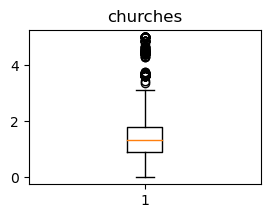

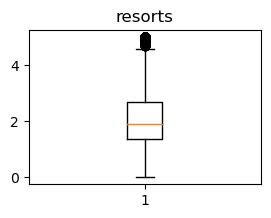

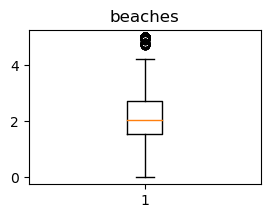

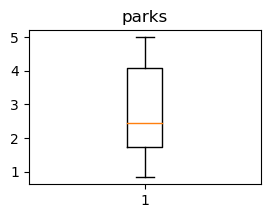

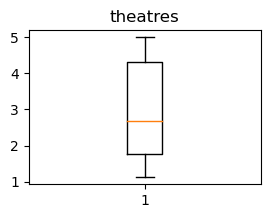

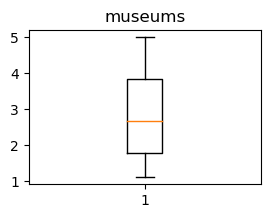

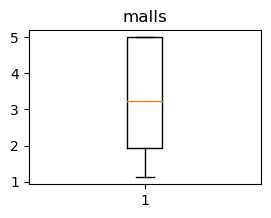

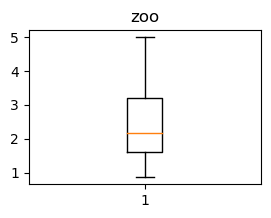

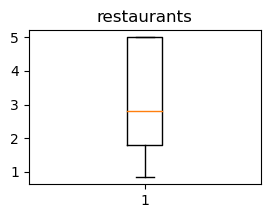

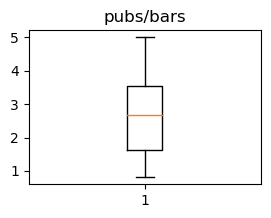

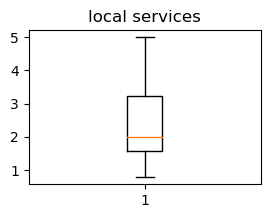

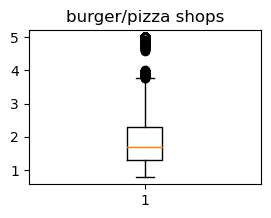

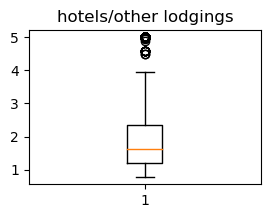

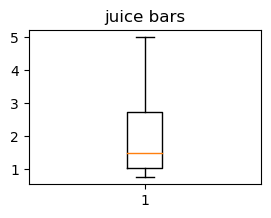

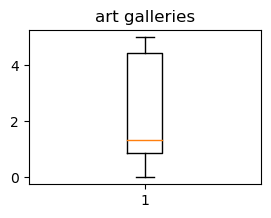

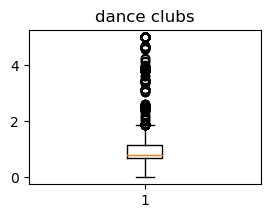

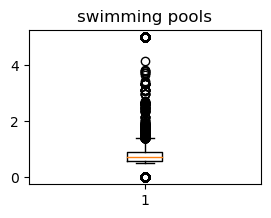

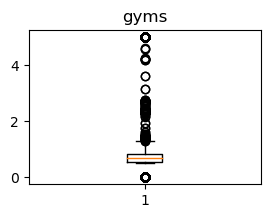

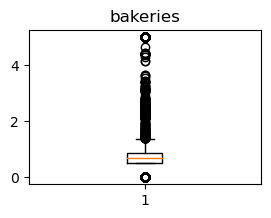

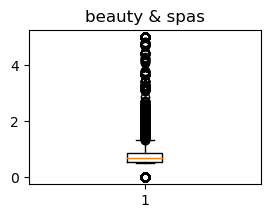

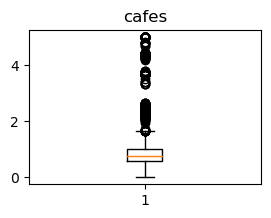

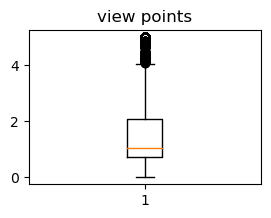

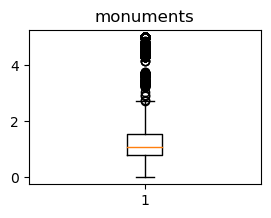

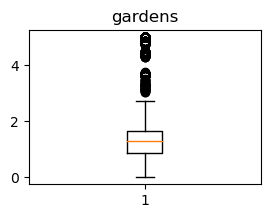

In [15]:
for i, column in enumerate(df.columns):
        plt.figure(figsize=(3, 2), dpi=100)
        plt.boxplot(df[column])
        plt.title(column)
        plt.show()

<h3>Outliers Detection Using Interquartile Range(IQR)</h3>

In [16]:
columns_with_outliers = ['churches','resorts','beaches','burger/pizza shops','hotels/other lodgings','dance clubs','swimming pools','gyms','bakeries','beauty & spas','cafes','view points','monuments','gardens']

Q1 = df[columns_with_outliers].quantile(0.25)

Q3 = df[columns_with_outliers].quantile(0.75)

IQR = Q3-Q1

In [17]:
IQR

churches                 0.8900
resorts                  1.3225
beaches                  1.2000
burger/pizza shops       0.9925
hotels/other lodgings    1.1700
dance clubs              0.4700
swimming pools           0.3300
gyms                     0.3100
bakeries                 0.3400
beauty & spas            0.3200
cafes                    0.4300
view points              1.3300
monuments                0.7700
gardens                  0.7800
dtype: float64

In [35]:
df_without_outliers = df
for i, column in enumerate(columns_with_outliers):
    df_without_outliers = df_without_outliers[(df_without_outliers[column] >= Q1[i] - 1.5 * IQR[i]) & (df_without_outliers[column] <= Q3[i] + 1.5 * IQR[i])]

In [19]:
df_without_outliers.shape

(686, 24)

<h3>Outliers Detection Using Percentile</h3>

In [28]:
lower_limit = []
upper_limit = []
for i, column in enumerate(columns_with_outliers):
    l_limit, u_limit = np.percentile(a=df_without_outliers[column], q=[0.5, 99.5])
    lower_limit.append(l_limit)
    upper_limit.append(u_limit)
print(lower_limit)
print(upper_limit)

[0.56425, 0.59425, 0.81, 0.84425, 0.81, 0.52, 0.51, 0.5, 0.51, 0.5, 0.0, 0.50425, 0.52, 0.54]
[2.4020000000000254, 4.0315, 4.02575, 2.876000000000004, 3.3105000000000064, 1.4290000000000056, 1.2130000000000019, 1.2072500000000013, 1.2872500000000013, 1.253000000000002, 1.4960000000000035, 1.8522500000000104, 1.6415000000000008, 1.5857500000000004]


In [39]:
print(df.shape)
df_without_outliers_perc = df
for i, column in enumerate(columns_with_outliers):
    df_without_outliers_perc = df_without_outliers_perc[(df_without_outliers_perc[column] > lower_limit[i]) & (df_without_outliers_perc[column] < upper_limit[i])]
df_without_outliers_perc.shape

(5456, 24)


(547, 24)

<h4>Standard Scaler</h4>

In [76]:
ss = StandardScaler()
df_standarad_scaled = ss.fit_transform(df)
df_standard_scaled = pd.DataFrame(df_standarad_scaled,columns=df.columns)
df_standard_scaled.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
1,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.139750,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
2,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
3,-1.759118,-1.280305,0.914217,0.636432,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223
4,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.332223


<h1>Modeli klasteriazcije</h1>

<h2>1 K-Means algoritam</h2>

<h3>Elbow point</h3>

In [28]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
}

# A list that holds the SSe values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

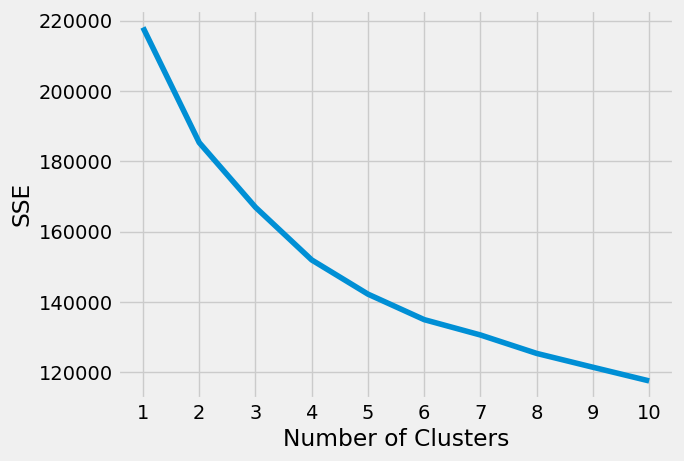

In [29]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11),sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [34]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction = "decreasing")
kl.elbow

4

<h3>Silhouette Score</h3>

In [35]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300
}

n_clusters = [2, 3, 4, 5, 6]
# A list that holds the SSe values for each k
sse = []

for k in n_clusters:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    predict = kmeans.fit_predict(df)
    score = silhouette_score(df, predict, random_state = 42)
    print("For {} clusters the silhouette score is {}".format(k, score))
    sse.append(score)

For 2 clusters the silhouette score is 0.14608331972575056
For 3 clusters the silhouette score is 0.14417751635912973
For 4 clusters the silhouette score is 0.1498890787235754
For 5 clusters the silhouette score is 0.1533779619763704
For 6 clusters the silhouette score is 0.1517769929416942


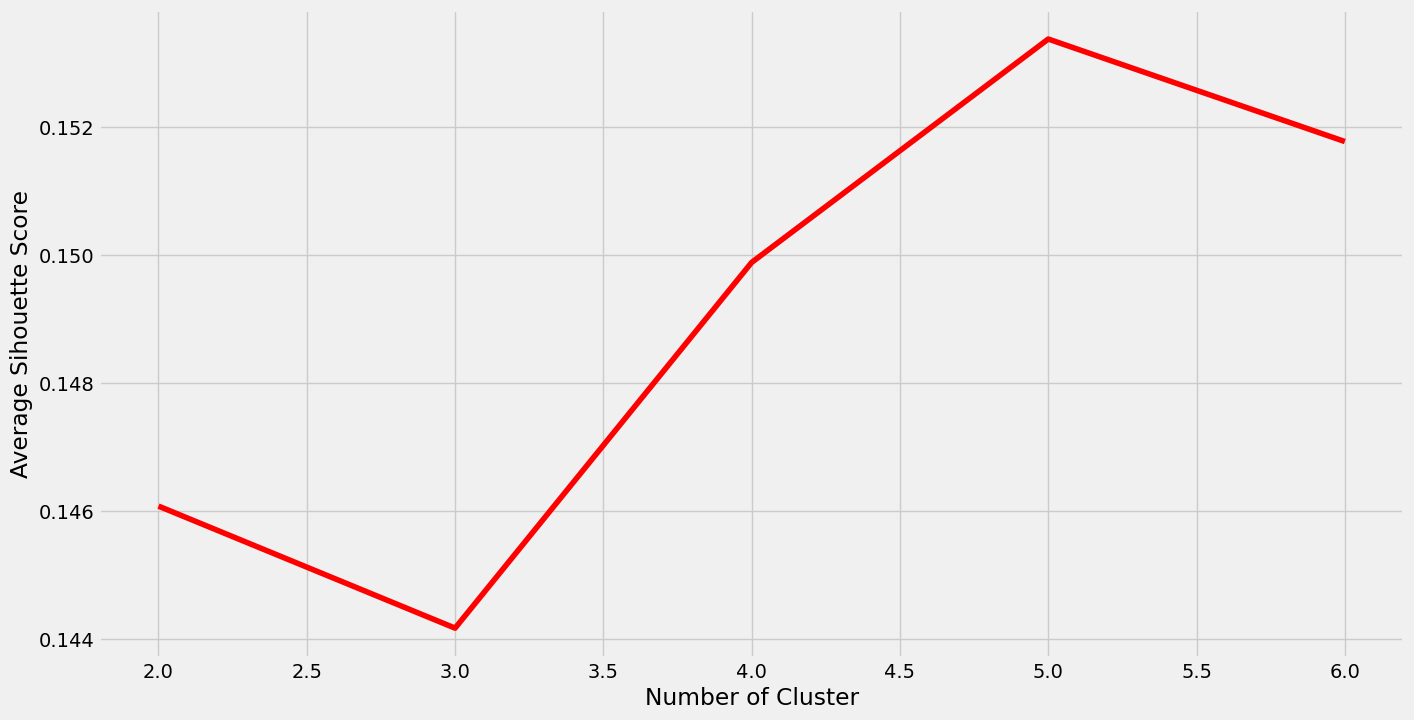

In [36]:
plt.figure(figsize=(15,8))
plt.plot(n_clusters,sse,'r')
plt.xlabel('Number of Cluster')
plt.ylabel('Average Sihouette Score')
plt.grid(True)
plt.show()

Zaključak: Na osnovu ove mere se dobija da je najbolje imati 5 klastera, pa će oba biti isprobana.

In [117]:
#problem
df_kmeans = df.copy()
kmeans = KMeans(n_clusters=4, init="k-means++", n_init = 10).fit(df_kmeans)
cluster=kmeans.labels_
df_kmeans["cluster_no"]=cluster

In [118]:
#prikaz broja elemenata u svakom klasteru
df_kmeans.cluster_no.value_counts()

2    1870
3    1592
1    1057
0     937
Name: cluster_no, dtype: int64

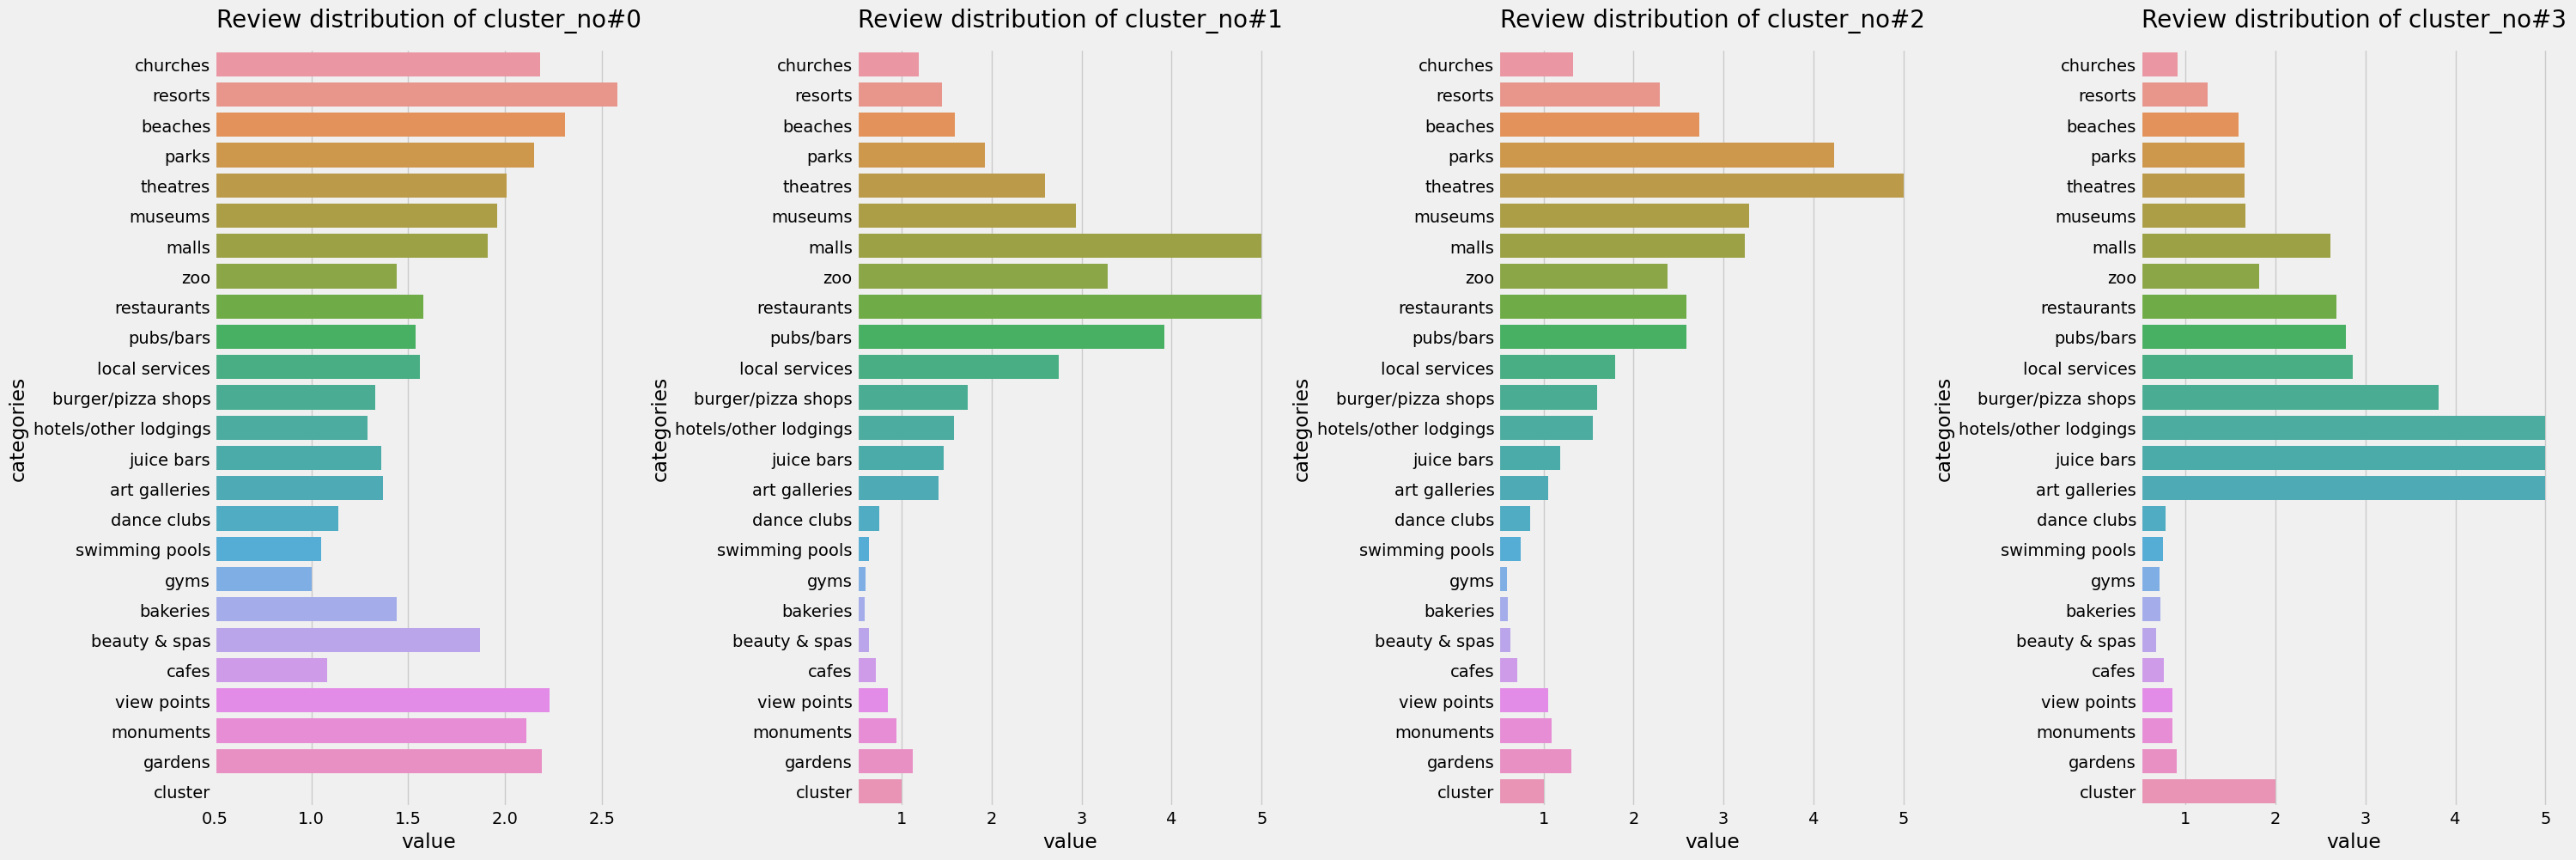

In [45]:
df_long = pd.melt(df_kmeans, "cluster_no", var_name="categories")
fig = plt.figure(figsize = (30,10))
for i in range(len(df_long.cluster_no.unique())):
    plt.subplot(1,len(df_long.cluster_no.unique()), i+1)
    g = sns.barplot(y='categories', x='value', data=df_long[df_long['cluster_no']==i], ci=None, estimator=np.median)
    g.set_title(f'Review distribution of cluster_no#{i}', y=1.02, fontsize=20)
    g.set_xlim(0.5)
fig.tight_layout(pad=0.5)
plt.show()

cluster_no0 su oni koji najvise vole resorts, al ima i dosta drugih stvari koje takodje vole <br>
cluster_no1 su oni koji najvise vole malls, restaurants, pubs/bars <br>
cluster_no2 su oni koji najvise vole parkove i pozorista <br>
cluster_no3 su oni koji najvise vole juice bars i art galleries, a nesto manje malls i hotels/other lodgings <br>

Sledeći korak je probati ovaj algoritam sa 5 klastera, posto je ovde za 3 klastera jasno sta korisnici vole a sta ne, 
sem za cluster_no0.

In [119]:
df_kmeans_5 = df.copy()
kmeans = KMeans(n_clusters=5, init="k-means++", n_init = 10).fit(df_kmeans_5)
cluster=kmeans.labels_
df_kmeans_5["cluster_no"]=cluster

In [120]:
df_kmeans_5.cluster_no.value_counts()

0    1627
2    1221
4     946
1     934
3     728
Name: cluster_no, dtype: int64

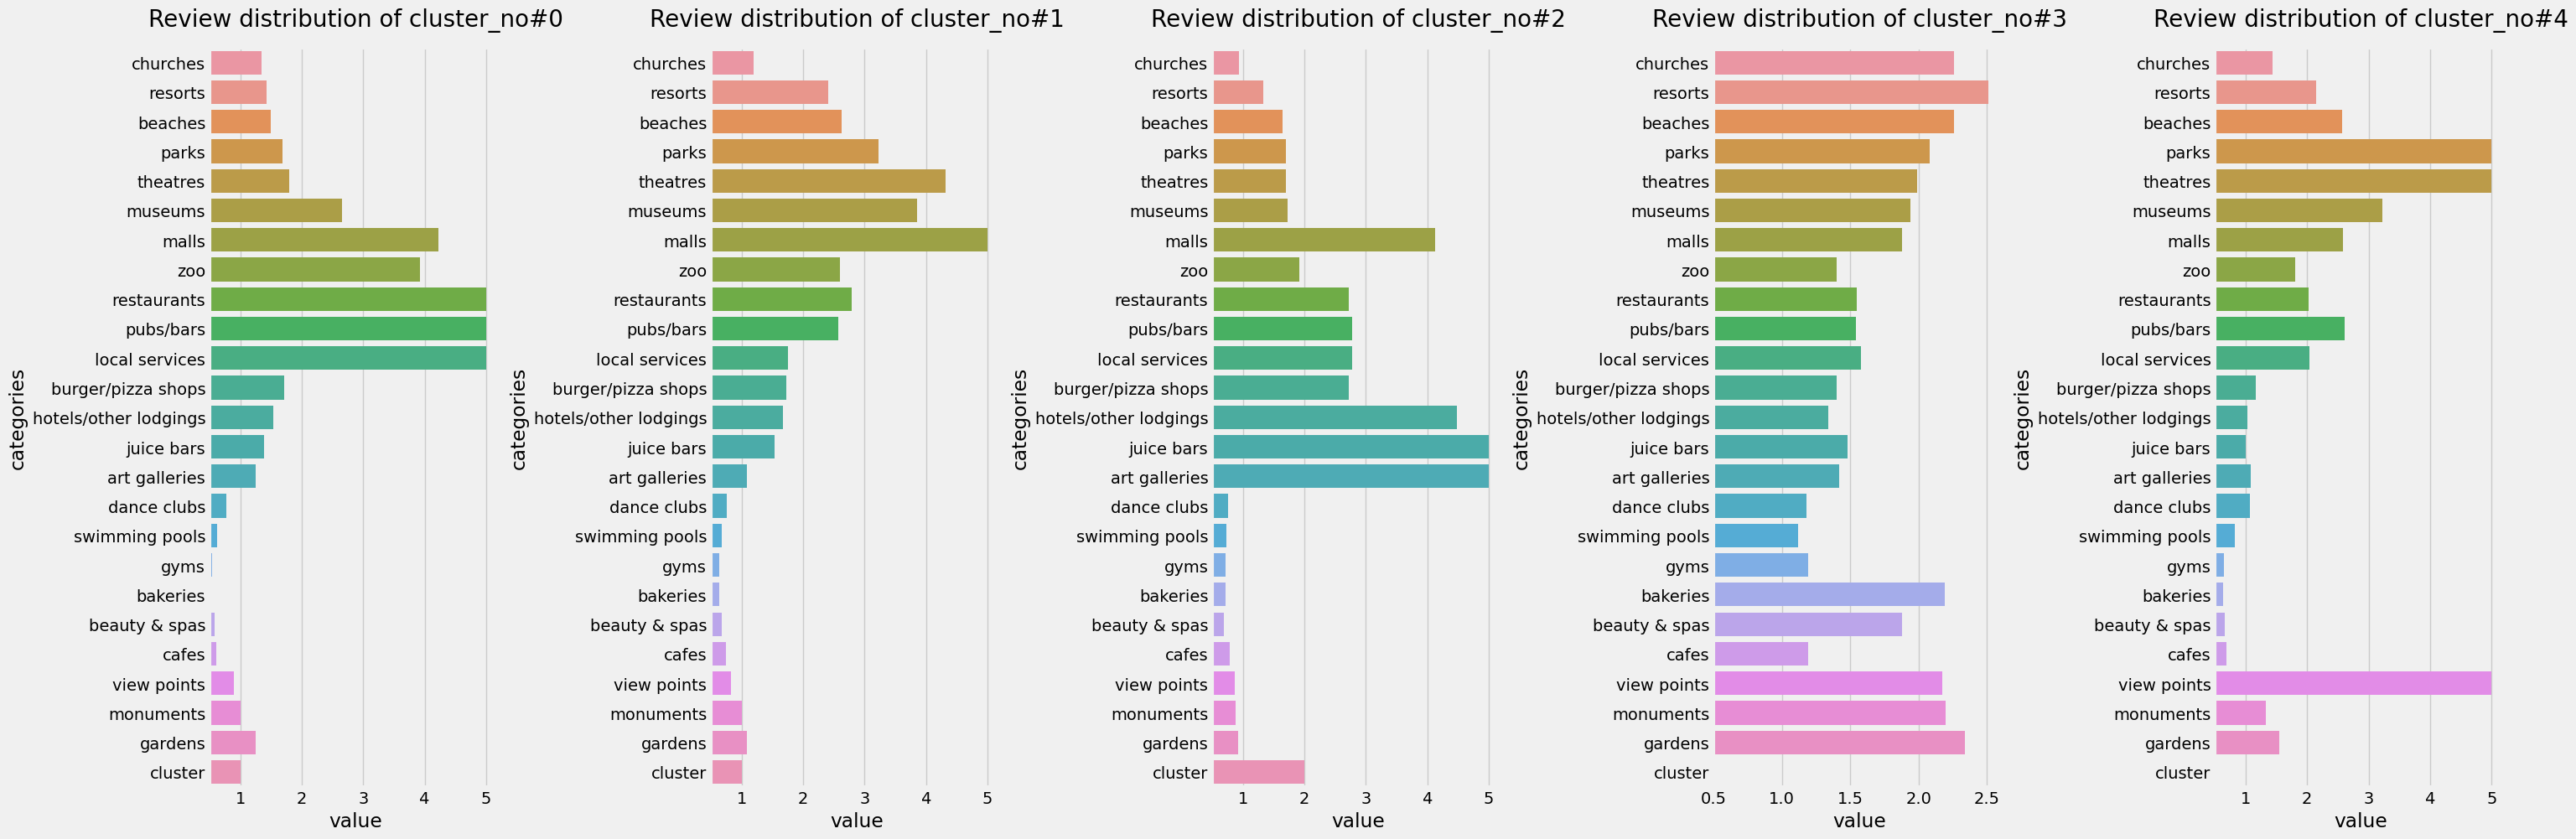

In [48]:
df_long = pd.melt(df_kmeans_5, "cluster_no", var_name="categories")
fig = plt.figure(figsize = (30,10))
for i in range(len(df_long.cluster_no.unique())):
    plt.subplot(1,len(df_long.cluster_no.unique()), i+1)
    g = sns.barplot(y='categories', x='value', data=df_long[df_long['cluster_no']==i], ci=None, estimator=np.median)
    g.set_title(f'Review distribution of cluster_no#{i}', y=1.02, fontsize=20)
    g.set_xlim(0.5)
fig.tight_layout(pad=0.5)
plt.show()

Zaključak: sa dodavanjem klastera 5 se nije mnogo promenila situacija, jer i dalje imamo jedan klaster u kom su svi koji vole 
dosta stvari, a ostali klasteri su slični kao oni koje već imamo sa 4 klastera.

<h2>2 DBSCAN</h2>

In [51]:
dbscan = DBSCAN(eps=3, min_samples=4)
model = dbscan.fit(df)
labels=model.labels_
sample_cores = np.zeros_like(labels, dtype=bool)
sample_cores[dbscan.core_sample_indices_] = True
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print(n_clusters)
print(silhouette_score(df, labels))

137
-0.12259458868478358


In [52]:
min_samples = df.shape[1] 
dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
clusters = dbscan.fit_predict(df)
print("clusters created: " + str(list(set(clusters))))

clusters created: [-1]


<h3>Implement DBSCAN with Elbow Method</h3>

Za n_neighbors je uzet broj 48, jer taj broj jeste broj_atributa*2

In [53]:
nbrs = NearestNeighbors(n_neighbors=48).fit(df)
distances, indices = nbrs.kneighbors(df)

In [54]:
print("min samples: " + str(min_samples))
print("shape of distances matrix " + str(distances.shape) + "\n")
for enum,row in enumerate(distances[:5]):
    print("observation " + str(enum) + ": " + str([round(x, 2) for x in row]))

min samples: 25
shape of distances matrix (5456, 48)

observation 0: [0.0, 0.28, 0.29, 0.29, 0.29, 0.5, 1.36, 1.37, 1.45, 2.53, 2.63, 2.75, 2.79, 3.13, 3.29, 3.36, 3.37, 3.38, 3.42, 3.48, 3.52, 3.64, 3.64, 3.67, 3.67, 3.73, 3.77, 3.77, 3.8, 3.81, 3.81, 3.82, 3.84, 3.84, 3.84, 3.84, 3.84, 3.85, 3.86, 3.87, 3.9, 3.9, 3.9, 3.9, 3.9, 3.91, 3.91, 3.92]
observation 1: [0.0, 0.02, 0.02, 0.03, 0.29, 0.58, 1.34, 1.35, 1.43, 2.55, 2.57, 2.75, 2.76, 3.12, 3.25, 3.32, 3.32, 3.34, 3.41, 3.45, 3.48, 3.57, 3.6, 3.6, 3.66, 3.77, 3.81, 3.81, 3.82, 3.83, 3.84, 3.85, 3.86, 3.88, 3.88, 3.88, 3.89, 3.89, 3.89, 3.89, 3.89, 3.9, 3.91, 3.91, 3.94, 3.95, 3.95, 3.96]
observation 2: [0.0, 0.0, 0.02, 0.02, 0.29, 0.58, 1.34, 1.35, 1.43, 2.55, 2.57, 2.74, 2.76, 3.12, 3.25, 3.32, 3.32, 3.34, 3.41, 3.44, 3.48, 3.57, 3.6, 3.6, 3.66, 3.77, 3.8, 3.81, 3.83, 3.84, 3.84, 3.85, 3.86, 3.88, 3.88, 3.88, 3.88, 3.88, 3.89, 3.89, 3.89, 3.89, 3.91, 3.92, 3.93, 3.95, 3.95, 3.95]
observation 3: [0.0, 0.5, 0.57, 0.58, 0.58, 0.58, 1

In [55]:
# the last cell of each row represetnts the distance of the k'th farthest point
df_farthest_dist = df.copy()
df_farthest_dist['knn_farthest_dist'] = distances[:, -1]
df_farthest_dist.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,cluster,knn_farthest_dist
user,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,3.918431
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,3.957613
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,3.953277
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,3.792914
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,3.953277


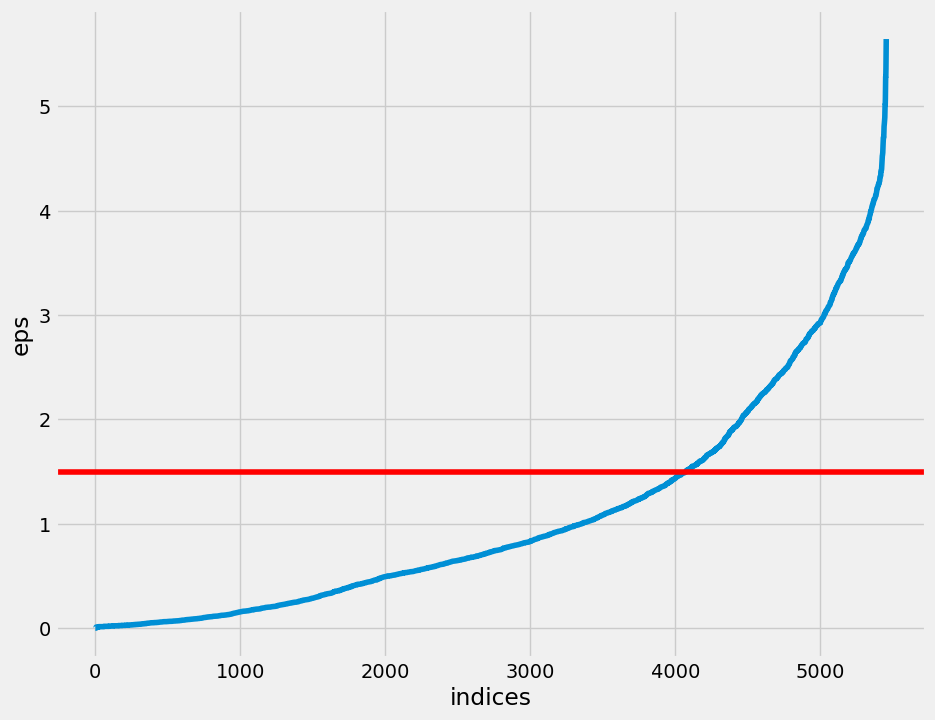

In [56]:
plt.figure(figsize=(10,8))
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.xlabel('indices')
plt.ylabel('eps')
plt.plot(distances)
plt.axhline(1.5,color='r')
plt.grid(True)
plt.show()

In [57]:
print(min_samples)
db = DBSCAN(eps=1.5, min_samples=48)
df_farthest_dist['cluster'] = db.fit_predict(df_farthest_dist)
df_farthest_dist.cluster.value_counts()

25


-1    5346
 0     110
Name: cluster, dtype: int64

Zaključak: ima previše outlier-a, a ostatak je stavljen u samo jedan klaster, sledeći korak jeste probati ovaj algoritam nad skaliranim dataset-om.

<h3>Implement DBSCAN with Elbow Method on scaled dataset</h3>

In [77]:
df_ss_dbscan = df_standarad_scaled.copy()
nn = NearestNeighbors(n_neighbors=48)
nn = nn.fit(df_ss_dbscan)
distances, indices = nn.kneighbors(df_ss_dbscan)

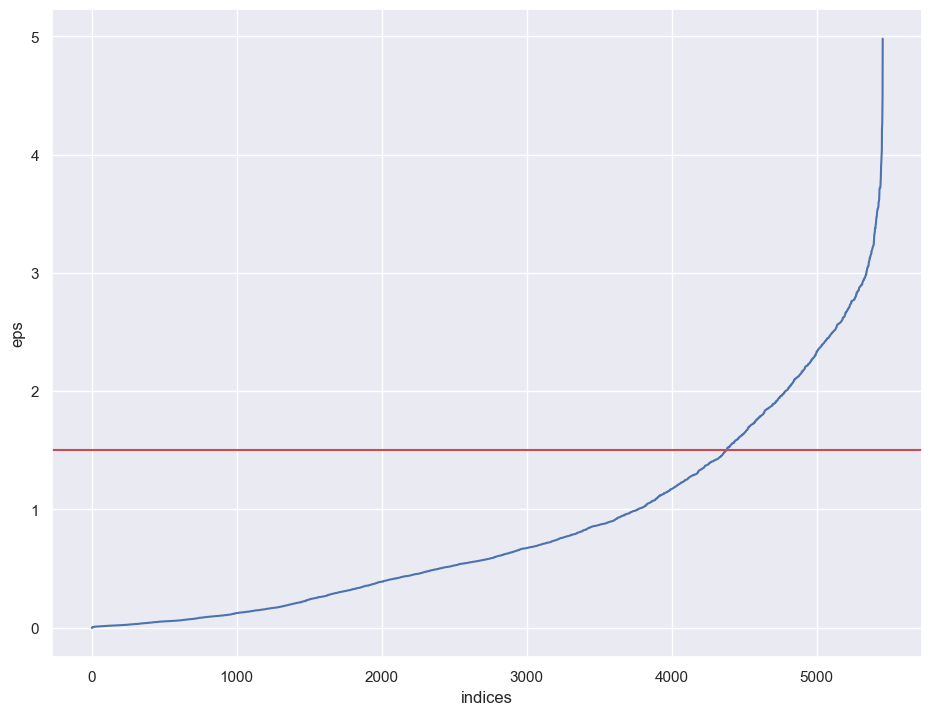

In [78]:
plt.figure(figsize=(10,8))
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.xlabel('indices')
plt.ylabel('eps')
plt.plot(distances)
plt.axhline(1.5,color='r')
plt.grid(True)
plt.show()

In [81]:
dbscan = DBSCAN(eps=1.5, min_samples=48)
dbscan.fit(df_ss_dbscan)
lbl = pd.DataFrame(dbscan.labels_,columns=['Cluster'])
lbl.value_counts()

Cluster
-1         5100
 0          129
 1          117
 2           55
 3           55
dtype: int64

Zaključak: Rezultati su samo neznatno bolji nakon primene DBSCAN algoritma nad skaliranim dataset-om zbog toga što ima više klastera, ali i dalje ostaje problem sa tim da veliki broj datapoint-a predstavlja outlier-e, 
pa je zaključak da je bolje koristiti kmeans algoritam.

<h2>Hijerarhijsko klasterovanje</h2>

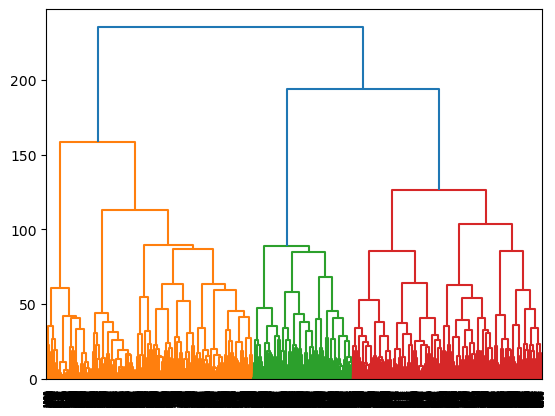

In [13]:
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

<h3>Isprobavanje razlicitih vrednosti za parametre n_clusters, linkage i metric</h3>

In [141]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

# Liste sa parametrima koje zelite da isprobate
n_clusters_list = [3,4,5,6]
linkage_list = ['ward','complete','average','single']
metric_list = ['euclidean', 'manhattan', 'cosine']

# Inicijalizacija najboljih parametara
best_n_clusters = 0
best_linkage = ""
best_metric = ""
best_silhouette_score = -1
best_davies_bouldin_score = float('inf')

# Petlja kroz liste parametara
for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        for metric in metric_list:
            if linkage == 'ward' and metric != 'euclidean':
                print("ward linkage metod can only work with euclidean distances. Skipping this iteration.")
                continue
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric = metric)
            # Fiting modela na podatke
            model.fit(df)
            # Izracunavanje indeksa Silhouette
            silhouette = silhouette_score(df, model.labels_)
            # Izracunavanje indeksa Davies-Bouldin
            davies_bouldin = davies_bouldin_score(df, model.labels_)
            # Ispis rezultata
            print("n_clusters:", n_clusters, " linkage:", linkage, "metric:", metric, " silhouette:", silhouette, " davies_bouldin:", davies_bouldin)
            # Ažuriranje najboljih parametara
            if silhouette > best_silhouette_score and davies_bouldin < best_davies_bouldin_score:
                best_n_clusters = n_clusters
                best_linkage = linkage
                best_metric = metric
                best_silhouette_score = silhouette
                best_davies_bouldin_score = davies_bouldin

# Ispis najboljih parametara
print("Najbolji parametri: n_clusters =", best_n_clusters, ", linkage =", best_linkage, ", metric =", best_metric)


n_clusters: 3  linkage: ward metric: euclidean  silhouette: 0.14134611918702286  davies_bouldin: 2.1751339012538815
ward linkage metod can only work with euclidean distances. Skipping this iteration.
ward linkage metod can only work with euclidean distances. Skipping this iteration.
n_clusters: 3  linkage: complete metric: euclidean  silhouette: 0.11845493099305503  davies_bouldin: 2.3016879708088944
n_clusters: 3  linkage: complete metric: manhattan  silhouette: 0.1504967488100579  davies_bouldin: 2.062272184769401
n_clusters: 3  linkage: complete metric: cosine  silhouette: 0.13449521539557865  davies_bouldin: 2.181606760270384
n_clusters: 3  linkage: average metric: euclidean  silhouette: 0.11665881276344302  davies_bouldin: 1.5294105589295885
n_clusters: 3  linkage: average metric: manhattan  silhouette: 0.15429791592447845  davies_bouldin: 1.8861037728667356
n_clusters: 3  linkage: average metric: cosine  silhouette: 0.15911851936446578  davies_bouldin: 1.9204419489066258
n_cluste

<h3>Primena algoritma sa najboljim parametrima</h3>

In [45]:
model = AgglomerativeClustering(n_clusters = 3, metric = 'manhattan', linkage = 'average')
model.fit(df)
labels = model.labels_
df_with_labels = df
df_with_labels['cluster'] = model.labels_
df_agglomerative = df_with_labels.copy()

In [46]:
#prikaz broja elemenata u svakom klasteru
df_with_labels.cluster.value_counts()

0    4401
2    1042
1      13
Name: cluster, dtype: int64

<function matplotlib.pyplot.savefig(*args, **kwargs)>

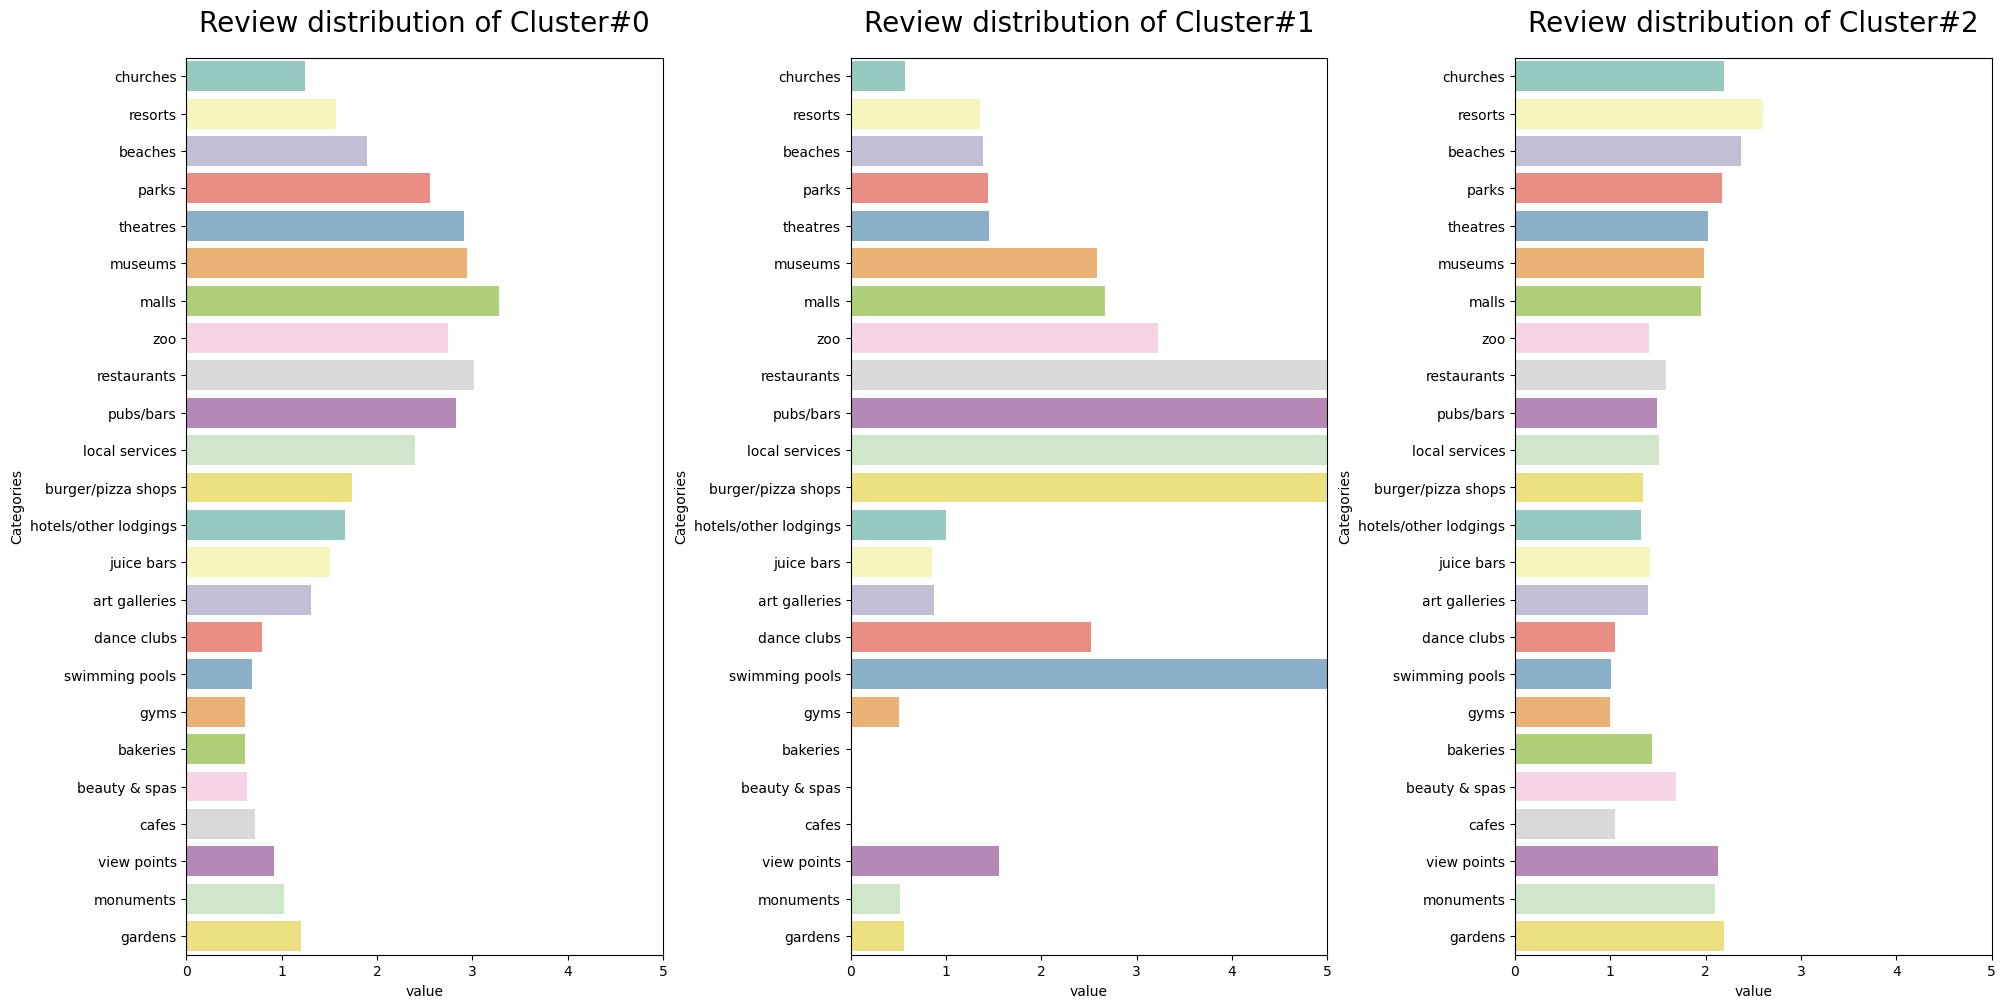

In [40]:
df_long = pd.melt(df_with_labels, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long.cluster.unique())):
    plt.subplot(1,len(df_long.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
#     g.set_xticklabels(g.get_xticklabels(),rotation=90);
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
#     g.set_xlabel("")
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
plt.savefig

<h3>Primena algoritma tako da je broj kastera 4(dendogram)</h3>

In [147]:
model = AgglomerativeClustering(n_clusters = 4, metric = 'cosine', linkage = 'average')
model.fit(df)
labels = model.labels_
df_with_labels = df
df_with_labels['cluster'] = model.labels_

In [148]:
#prikaz broja elemenata u svakom klasteru
df_with_labels.cluster.value_counts()

2    3768
3     894
0     638
1     156
Name: cluster, dtype: int64

<function matplotlib.pyplot.savefig(*args, **kwargs)>

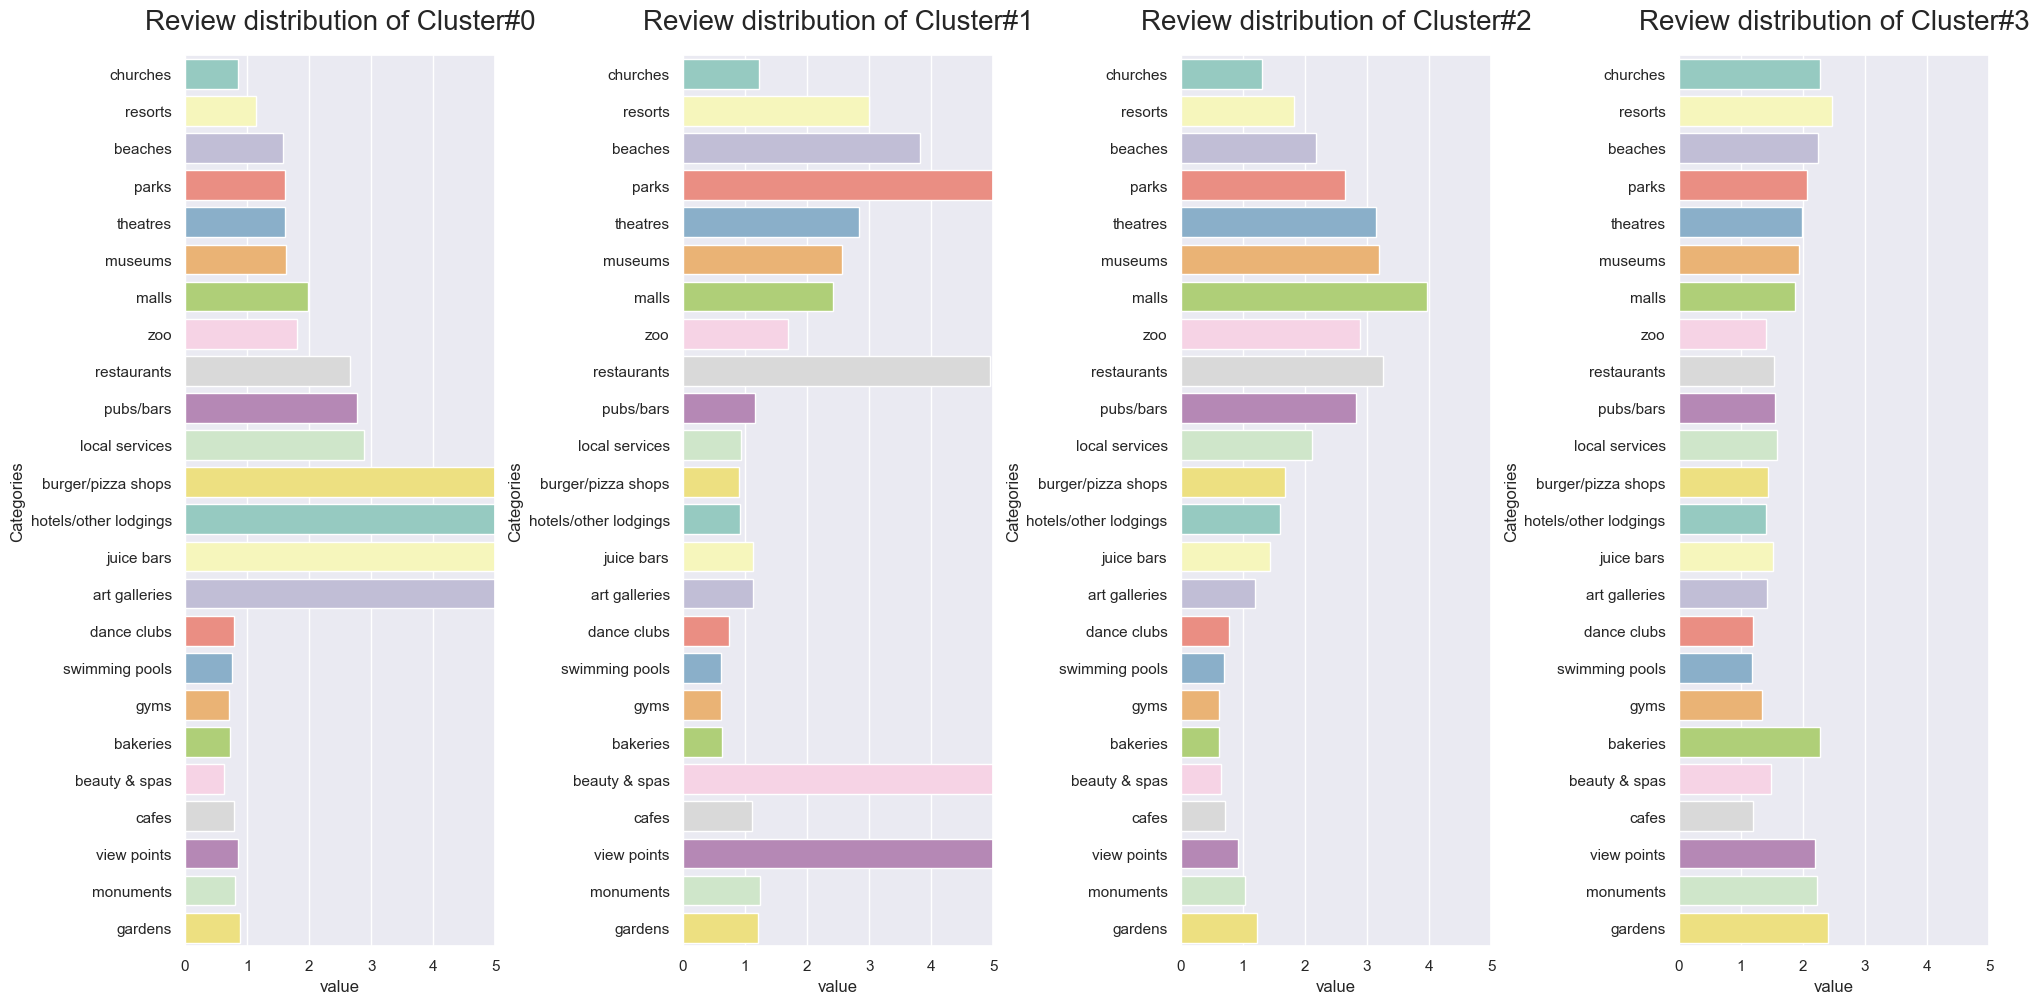

In [149]:
df_long = pd.melt(df_with_labels, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long.cluster.unique())):
    plt.subplot(1,len(df_long.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
#     g.set_xticklabels(g.get_xticklabels(),rotation=90);
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
#     g.set_xlabel("")
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
plt.savefig

In [103]:
model = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
model.fit(df)
labels = model.labels_
df_with_labels = df
df_with_labels['cluster'] = model.labels_

In [104]:
#prikaz broja elemenata u svakom klasteru
df_with_labels.cluster.value_counts()

0    2278
1    2087
2    1091
Name: cluster, dtype: int64

<function matplotlib.pyplot.savefig(*args, **kwargs)>

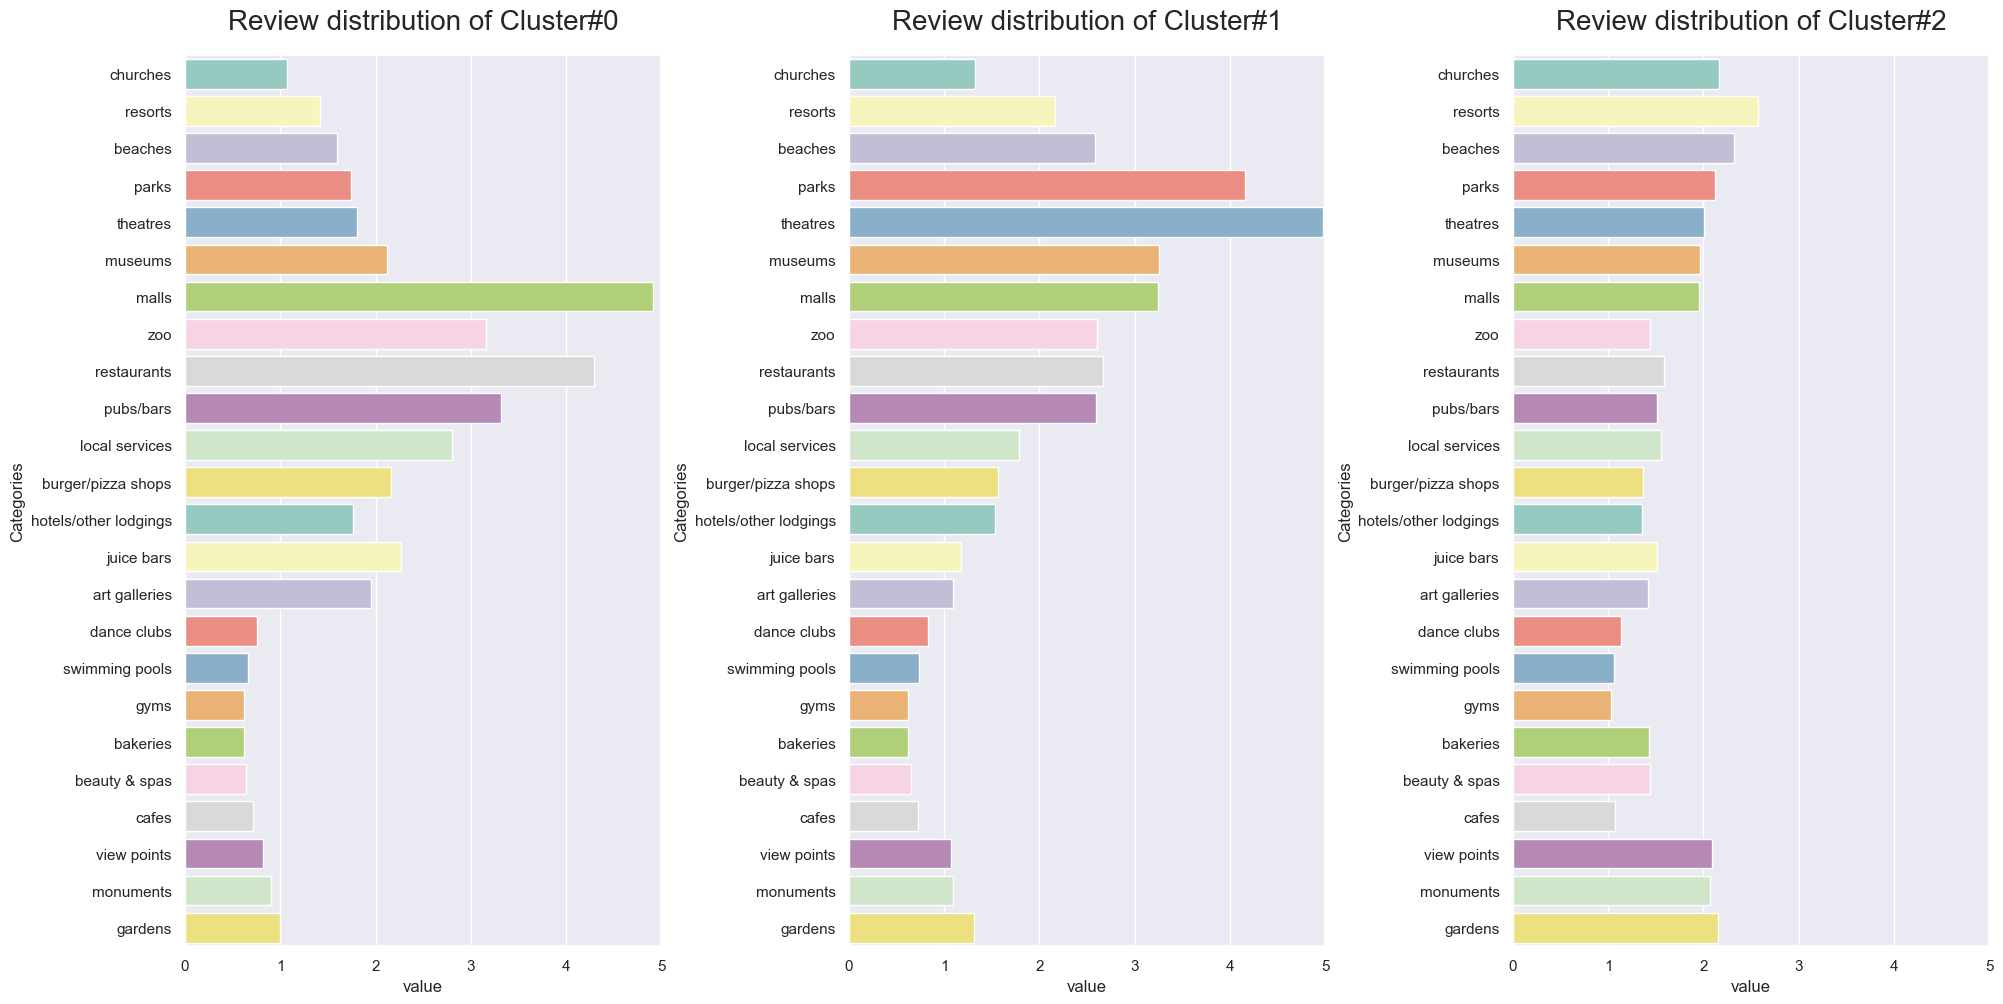

In [105]:
df_long = pd.melt(df_with_labels, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long.cluster.unique())):
    plt.subplot(1,len(df_long.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
#     g.set_xticklabels(g.get_xticklabels(),rotation=90);
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
#     g.set_xlabel("")
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
plt.savefig

<h2>Birch algoritam</h2>

<h3>Isprobavanje razlicitih vrednosti za treshold parametar</h3>

In [16]:
best_score = -1
best_threshold = None
best_model = None

for threshold in np.linspace(0.001, 1, 20):
    model = Birch(threshold=threshold)
    model.fit(df)
    labels = model.labels_
    
    silhouette = silhouette_score(df, labels)
    davies = davies_bouldin_score(df, labels)
    
    if silhouette > best_score:
        best_score = silhouette
        best_threshold = threshold
        best_model = model
    print(f"Threshold: {threshold:.3f} | Silhouette: {silhouette:.3f} | Davies-Bouldin: {davies:.3f}")

print(f"Best threshold: {best_threshold:.3f}")


Threshold: 0.001 | Silhouette: 0.129 | Davies-Bouldin: 2.319
Threshold: 0.054 | Silhouette: 0.131 | Davies-Bouldin: 2.277
Threshold: 0.106 | Silhouette: 0.122 | Davies-Bouldin: 2.344
Threshold: 0.159 | Silhouette: 0.128 | Davies-Bouldin: 2.297
Threshold: 0.211 | Silhouette: 0.135 | Davies-Bouldin: 2.271
Threshold: 0.264 | Silhouette: 0.133 | Davies-Bouldin: 2.273
Threshold: 0.316 | Silhouette: 0.121 | Davies-Bouldin: 2.373
Threshold: 0.369 | Silhouette: 0.138 | Davies-Bouldin: 2.195
Threshold: 0.422 | Silhouette: 0.126 | Davies-Bouldin: 2.376
Threshold: 0.474 | Silhouette: 0.130 | Davies-Bouldin: 2.274
Threshold: 0.527 | Silhouette: 0.130 | Davies-Bouldin: 2.275
Threshold: 0.579 | Silhouette: 0.131 | Davies-Bouldin: 2.314
Threshold: 0.632 | Silhouette: 0.128 | Davies-Bouldin: 2.310
Threshold: 0.685 | Silhouette: 0.127 | Davies-Bouldin: 2.308
Threshold: 0.737 | Silhouette: 0.133 | Davies-Bouldin: 2.250
Threshold: 0.790 | Silhouette: 0.132 | Davies-Bouldin: 2.286
Threshold: 0.842 | Silho

<h3>Primena algoritma sa najboljom vrednoscu treshold parametra</h3>

In [65]:
# Create an instance of the BIRCH algorithm with the desired parameters
birch = Birch(threshold=0.369)

# Fit the model to the data
birch.fit(df)

# Get the cluster labels for each data point
labels = birch.labels_
print(np.unique(labels))

df_with_labels = df
df_with_labels['cluster'] = birch.labels_
df_birch = df_with_labels.copy()

[0 1 2]


In [66]:
#prikaz broja elemenata u svakom klasteru
df_with_labels.cluster.value_counts()

1    2311
0    2168
2     977
Name: cluster, dtype: int64

<function matplotlib.pyplot.savefig(*args, **kwargs)>

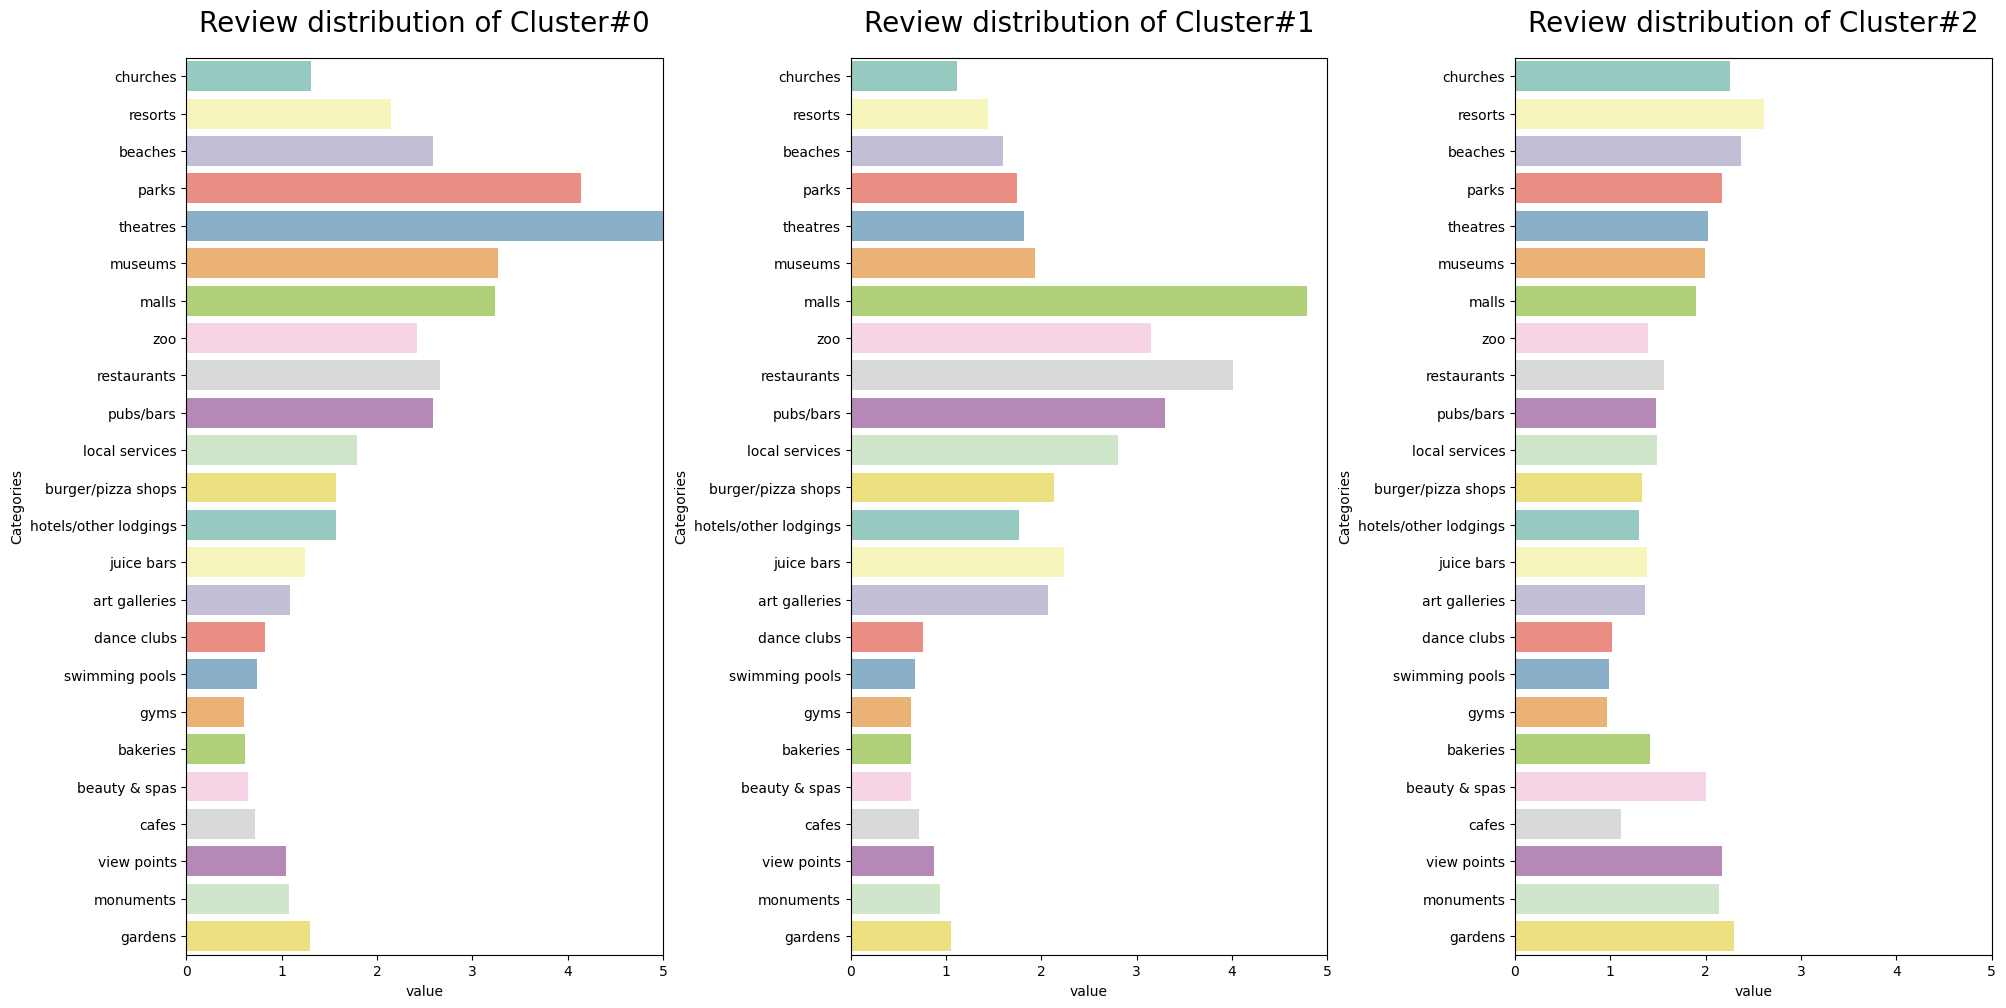

In [67]:
df_long = pd.melt(df_with_labels, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long.cluster.unique())):
    plt.subplot(1,len(df_long.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
#     g.set_xticklabels(g.get_xticklabels(),rotation=90);
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
#     g.set_xlabel("")
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
plt.savefig

<h2> Dodatna klasterizacija nad podacima koji pripadaju klasteru u kom se jasno ne vidi koji atributi dominiraju</h2>

<h3>Hijerarhisjko klasterovanje</h3>

In [52]:
df_cluster_2 = df_agglomerative[df_agglomerative['cluster'] == 2]
df_cluster_2.drop(['cluster'], axis = 1)
df_cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, User 760 to User 5456
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               1042 non-null   float64
 1   resorts                1042 non-null   float64
 2   beaches                1042 non-null   float64
 3   parks                  1042 non-null   float64
 4   theatres               1042 non-null   float64
 5   museums                1042 non-null   float64
 6   malls                  1042 non-null   float64
 7   zoo                    1042 non-null   float64
 8   restaurants            1042 non-null   float64
 9   pubs/bars              1042 non-null   float64
 10  local services         1042 non-null   float64
 11  burger/pizza shops     1042 non-null   float64
 12  hotels/other lodgings  1042 non-null   float64
 13  juice bars             1042 non-null   float64
 14  art galleries          1042 non-null   float64
 1

<h4>Isprobavanje razlicitih vrednosti za parametre n_clusters, linkage i metric</h4>

In [53]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

# Liste sa parametrima koje zelite da isprobate
n_clusters_list = [3,4,5,6]
linkage_list = ['ward','complete','average','single']
metric_list = ['euclidean', 'manhattan', 'cosine']

# Inicijalizacija najboljih parametara
best_n_clusters = 0
best_linkage = ""
best_metric = ""
best_silhouette_score = -1
best_davies_bouldin_score = float('inf')

# Petlja kroz liste parametara
for n_clusters in n_clusters_list:
    for linkage in linkage_list:
        for metric in metric_list:
            if linkage == 'ward' and metric != 'euclidean':
                print("ward linkage metod can only work with euclidean distances. Skipping this iteration.")
                continue
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric = metric)
            # Fiting modela na podatke
            model.fit(df_cluster_2)
            # Izracunavanje indeksa Silhouette
            silhouette = silhouette_score(df_cluster_2, model.labels_)
            # Izracunavanje indeksa Davies-Bouldin
            davies_bouldin = davies_bouldin_score(df_cluster_2, model.labels_)
            # Ispis rezultata
            print("n_clusters:", n_clusters, " linkage:", linkage, "metric:", metric, " silhouette:", silhouette, " davies_bouldin:", davies_bouldin)
            # Ažuriranje najboljih parametara
            if silhouette > best_silhouette_score and davies_bouldin < best_davies_bouldin_score:
                best_n_clusters = n_clusters
                best_linkage = linkage
                best_metric = metric
                best_silhouette_score = silhouette
                best_davies_bouldin_score = davies_bouldin

# Ispis najboljih parametara
print("Najbolji parametri: n_clusters =", best_n_clusters, ", linkage =", best_linkage, ", metric =", best_metric)


n_clusters: 3  linkage: ward metric: euclidean  silhouette: 0.13424662703363727  davies_bouldin: 2.207646334998868
ward linkage metod can only work with euclidean distances. Skipping this iteration.
ward linkage metod can only work with euclidean distances. Skipping this iteration.
n_clusters: 3  linkage: complete metric: euclidean  silhouette: 0.07779266191992336  davies_bouldin: 2.555607468710997
n_clusters: 3  linkage: complete metric: manhattan  silhouette: 0.11771969200699854  davies_bouldin: 2.0601826329622046
n_clusters: 3  linkage: complete metric: cosine  silhouette: 0.11117018091906186  davies_bouldin: 3.0173667845812795
n_clusters: 3  linkage: average metric: euclidean  silhouette: 0.1346304721327574  davies_bouldin: 1.2113111648246833
n_clusters: 3  linkage: average metric: manhattan  silhouette: 0.12427237358595693  davies_bouldin: 2.3038483760209894
n_clusters: 3  linkage: average metric: cosine  silhouette: 0.11443479840914748  davies_bouldin: 2.111905158205015
n_cluster

<h4>Primena algoritma sa najboljim parametrima</h4>

In [54]:
model = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
model.fit(df_cluster_2)
labels = model.labels_
df_with_labels = df_cluster_2.copy()
df_with_labels['cluster'] = model.labels_

In [55]:
#prikaz broja elemenata u svakom klasteru
df_with_labels.cluster.value_counts()

0    357
2    280
3    209
1    196
Name: cluster, dtype: int64

<function matplotlib.pyplot.savefig(*args, **kwargs)>

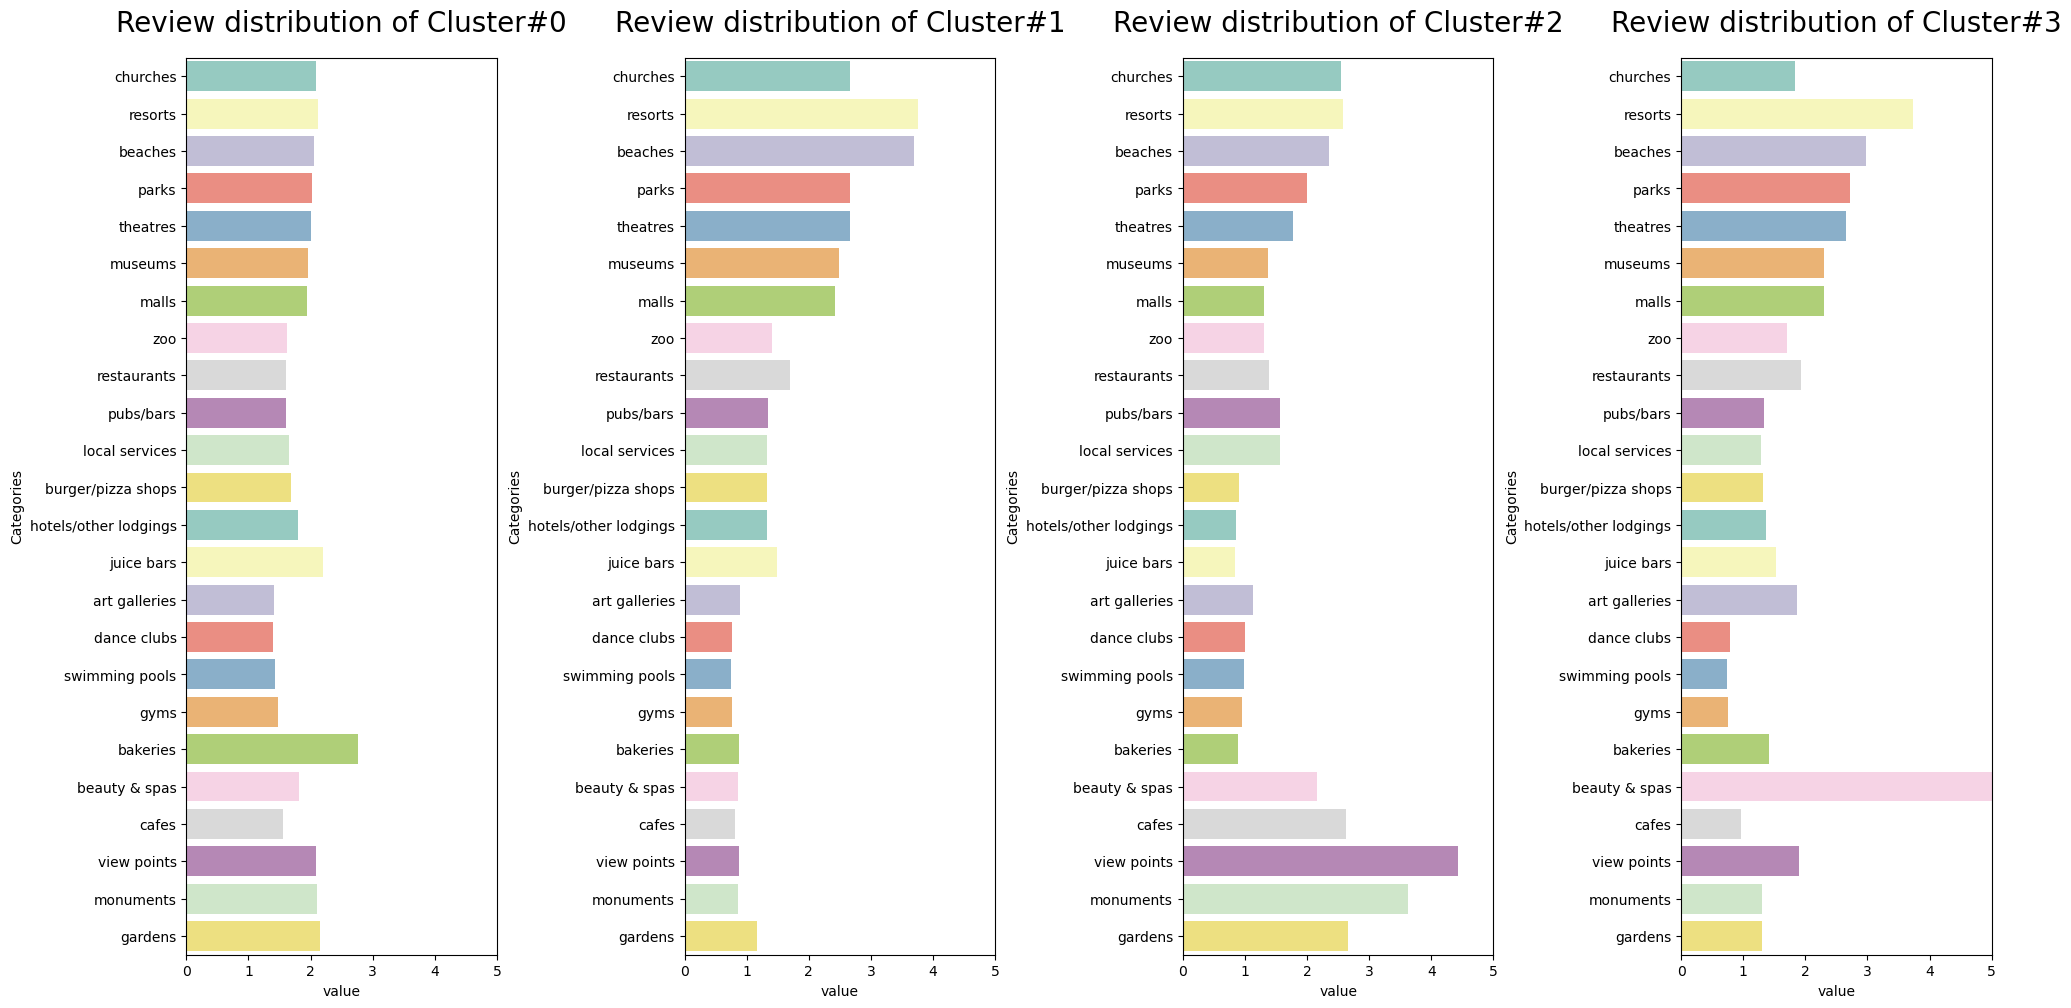

In [56]:
df_long = pd.melt(df_with_labels, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long.cluster.unique())):
    plt.subplot(1,len(df_long.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
#     g.set_xticklabels(g.get_xticklabels(),rotation=90);
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
#     g.set_xlabel("")
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
plt.savefig

<h4>Primena algoritma tako da broj n_clusters bude 3</h4>

In [57]:
model = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')
model.fit(df_cluster_2)
labels = model.labels_
df_with_labels = df_cluster_2.copy()
df_with_labels['cluster'] = model.labels_

In [58]:
#prikaz broja elemenata u svakom klasteru
df_with_labels.cluster.value_counts()

0    1040
2       1
1       1
Name: cluster, dtype: int64

<h3>Birch algoritam</h3>

<h4>Isprobavanje razlicitih vrednosti za treshold parametar</h4>

In [68]:
best_score = -1
best_threshold = None
best_model = None

for threshold in np.linspace(0.001, 1, 20):
    model = Birch(threshold=threshold)
    model.fit(df_birch)
    labels = model.labels_
    
    silhouette = silhouette_score(df_birch, labels)
    davies = davies_bouldin_score(df_birch, labels)
    
    if silhouette > best_score:
        best_score = silhouette
        best_threshold = threshold
        best_model = model
    print(f"Threshold: {threshold:.3f} | Silhouette: {silhouette:.3f} | Davies-Bouldin: {davies:.3f}")

print(f"Best threshold: {best_threshold:.3f}")

Threshold: 0.001 | Silhouette: 0.139 | Davies-Bouldin: 2.213
Threshold: 0.054 | Silhouette: 0.140 | Davies-Bouldin: 2.207
Threshold: 0.106 | Silhouette: 0.134 | Davies-Bouldin: 2.256
Threshold: 0.159 | Silhouette: 0.139 | Davies-Bouldin: 2.233
Threshold: 0.211 | Silhouette: 0.139 | Davies-Bouldin: 2.216
Threshold: 0.264 | Silhouette: 0.140 | Davies-Bouldin: 2.204
Threshold: 0.316 | Silhouette: 0.139 | Davies-Bouldin: 2.205
Threshold: 0.369 | Silhouette: 0.133 | Davies-Bouldin: 2.260
Threshold: 0.422 | Silhouette: 0.140 | Davies-Bouldin: 2.203
Threshold: 0.474 | Silhouette: 0.133 | Davies-Bouldin: 2.256
Threshold: 0.527 | Silhouette: 0.138 | Davies-Bouldin: 2.212
Threshold: 0.579 | Silhouette: 0.136 | Davies-Bouldin: 2.223
Threshold: 0.632 | Silhouette: 0.135 | Davies-Bouldin: 2.246
Threshold: 0.685 | Silhouette: 0.136 | Davies-Bouldin: 2.226
Threshold: 0.737 | Silhouette: 0.129 | Davies-Bouldin: 2.260
Threshold: 0.790 | Silhouette: 0.133 | Davies-Bouldin: 2.271
Threshold: 0.842 | Silho

<h4>Primena algoritma sa najboljom vrednoscu treshold parametra</h4>

In [70]:
# Create an instance of the BIRCH algorithm with the desired parameters
birch = Birch(threshold=1.000)

# Fit the model to the data
birch.fit(df_birch)

# Get the cluster labels for each data point
labels = birch.labels_
print(np.unique(labels))

df_with_labels = df
df_with_labels['cluster'] = birch.labels_

[0 1 2]


In [71]:
#prikaz broja elemenata u svakom klasteru
df_with_labels.cluster.value_counts()

0    2246
2    2217
1     993
Name: cluster, dtype: int64

<function matplotlib.pyplot.savefig(*args, **kwargs)>

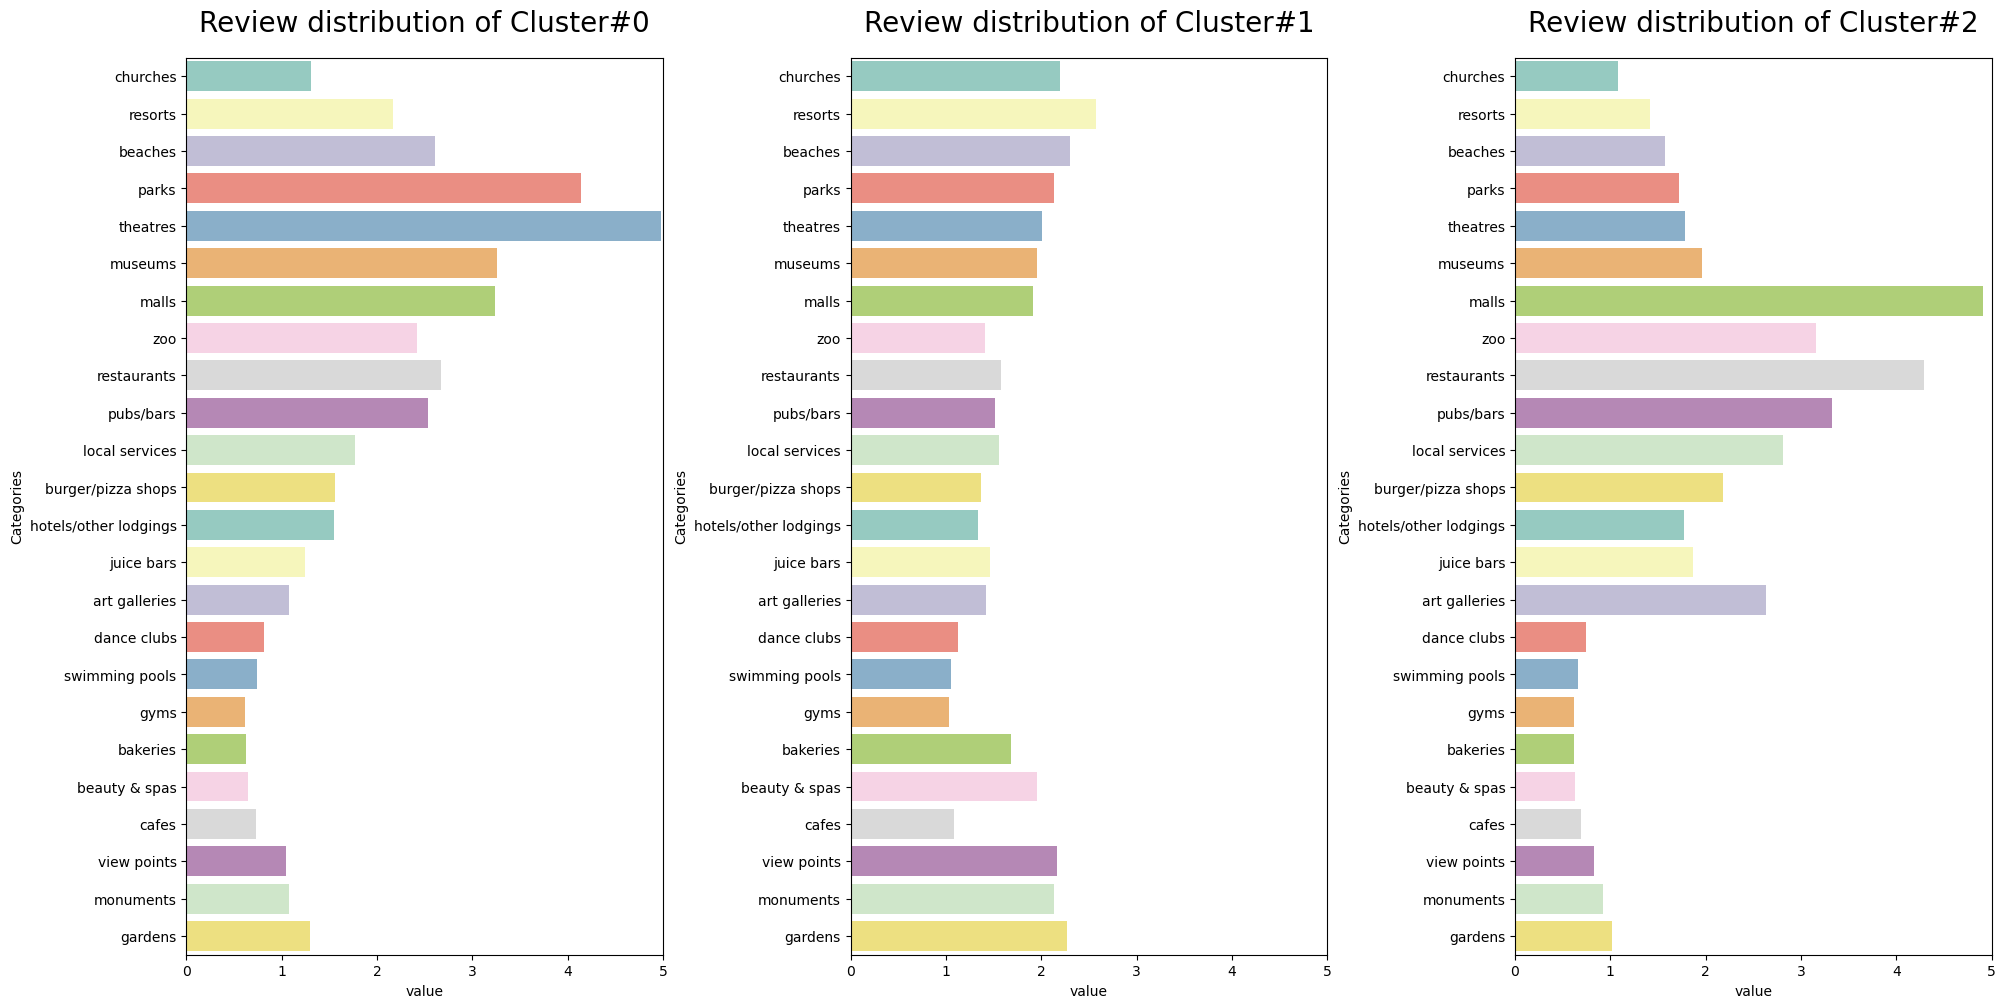

In [72]:
df_long = pd.melt(df_with_labels, "cluster", var_name="categories")

fig = plt.figure(figsize = (20,10))
for i in range(len(df_long.cluster.unique())):
    plt.subplot(1,len(df_long.cluster.unique()),i+1)
    g = sns.barplot(y='categories',x='value',data=df_long[df_long['cluster']==i],palette='Set3',ci=None,estimator=np.median)
#     g.set_xticklabels(g.get_xticklabels(),rotation=90);
    g.set_title(f'Review distribution of Cluster#{i}',y=1.02,fontsize=20)
#     g.set_xlabel("")
    g.set_ylabel('Categories')
    g.set_xlim(0,5)
fig.tight_layout(pad=0.5)
plt.savefig